In [801]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [44]:
# Loading The REQUIRED Library

In [45]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

In [444]:
# Cleaning the Dataset

In [553]:
data_demandx=pd.read_csv("STORE_DATA.csv")
data_demandx=data_demandx.dropna()
# ro eliminate all the negative shipmmnets ('because in pour system there is return orders also')
data_demandx=data_demandx[data_demandx.SumOfShipwght>0]
data_demandx

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city
0,5,28,3-Jan-97,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
1,5,28,10-Jan-97,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
2,5,28,17-Jan-97,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
3,5,28,24-Jan-97,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
4,5,28,7-Feb-97,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
...,...,...,...,...,...,...,...,...
2279,50,585,16-Jul-97,10196.09,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2280,50,585,23-Jul-97,6028.69,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2281,50,585,30-Jul-97,4516.90,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2282,50,585,6-Aug-97,11671.88,87.0,TX,2828 SOUTH HWY 6,HOUSTON


In [47]:
############ ONly COnsidering Texas Locations #############
data_demandx=data_demandx[data_demandx.Store_region=='TX']
data_demandx

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city
0,5,28,3-Jan-97,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
1,5,28,10-Jan-97,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
2,5,28,17-Jan-97,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
3,5,28,24-Jan-97,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
4,5,28,7-Feb-97,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY
...,...,...,...,...,...,...,...,...
2279,50,585,16-Jul-97,10196.09,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2280,50,585,23-Jul-97,6028.69,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2281,50,585,30-Jul-97,4516.90,87.0,TX,2828 SOUTH HWY 6,HOUSTON
2282,50,585,6-Aug-97,11671.88,87.0,TX,2828 SOUTH HWY 6,HOUSTON


In [48]:
#########Finding out which all stores are unique ###########
n_stores=data_demandx['Store'].unique()
len(n_stores)

51

In [49]:
data_demand=data_demandx
from datetime import datetime
data_demand.ShipDate=pd.to_datetime(data_demandx.ShipDate)

C:\Users\ishan\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [50]:
data_demand['weeklyship']=data_demand["ShipDate"].dt.to_period("W")
data_demand

<ipython-input-50-1b3edb114c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demand['weeklyship']=data_demand["ShipDate"].dt.to_period("W")


,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city,weeklyship
0,5,28,1997-01-03,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1996-12-30/1997-01-05
1,5,28,1997-01-10,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-01-06/1997-01-12
2,5,28,1997-01-17,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-01-13/1997-01-19
3,5,28,1997-01-24,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-01-20/1997-01-26
4,5,28,1997-02-07,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-02-03/1997-02-09
...,...,...,...,...,...,...,...,...,...
2279,50,585,1997-07-16,10196.09,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-07-14/1997-07-20
2280,50,585,1997-07-23,6028.69,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-07-21/1997-07-27
2281,50,585,1997-07-30,4516.90,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-07-28/1997-08-03
2282,50,585,1997-08-06,11671.88,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-08-04/1997-08-10


In [51]:
# also Need to include x, and y coordinates of each store in dataframe. need it later

In [52]:
# Loading the coordinates files of eachs stores
store_coord=pd.read_excel("Coordinates.xlsx")

In [53]:
store_cordinates={}
for i in store_coord.index:
    store_cordinates[store_coord['Store'][i]]=(store_coord['X'][i],store_coord['Y'][i])

In [54]:
# creating two columns in dataframes names as xcord and ycord
data_demand['xcord']=10.000
data_demand['ycord']=10.000

<ipython-input-54-5bdb042cc1bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demand['xcord']=10.000
<ipython-input-54-5bdb042cc1bb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demand['ycord']=10.000


In [55]:
for i in data_demand.index:
    for j in n_stores:
        if data_demand['Store'][i]==j:
            data_demand['xcord'][i]=store_cordinates[j][0]
            data_demand['ycord'][i]=store_cordinates[j][1]

<ipython-input-55-3a0dc2449324>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demand['xcord'][i]=store_cordinates[j][0]
C:\Users\ishan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-55-3a0dc2449324>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demand['ycord'][i]=store_cordinates[j][1]


In [56]:
data_demand

,Account,Store,ShipDate,SumOfShipwght,Tour,Store_region,Store_address,store_city,weeklyship,xcord,ycord
0,5,28,1997-01-03,481.28,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1996-12-30/1997-01-05,30.658171,-96.326640
1,5,28,1997-01-10,94.00,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-01-06/1997-01-12,30.658171,-96.326640
2,5,28,1997-01-17,543.72,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-01-13/1997-01-19,30.658171,-96.326640
3,5,28,1997-01-24,580.15,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-01-20/1997-01-26,30.658171,-96.326640
4,5,28,1997-02-07,789.20,90.0,TX,3620 EMMETT F LOWRY EXPRWAY,TEXAS CITY,1997-02-03/1997-02-09,30.658171,-96.326640
...,...,...,...,...,...,...,...,...,...,...,...
2279,50,585,1997-07-16,10196.09,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-07-14/1997-07-20,29.728156,-95.644109
2280,50,585,1997-07-23,6028.69,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-07-21/1997-07-27,29.728156,-95.644109
2281,50,585,1997-07-30,4516.90,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-07-28/1997-08-03,29.728156,-95.644109
2282,50,585,1997-08-06,11671.88,87.0,TX,2828 SOUTH HWY 6,HOUSTON,1997-08-04/1997-08-10,29.728156,-95.644109


### Coordinates

In [57]:
#### COORDINATES/LOCATION OF THE 51 STORES - Approximated using the Actual GPS location of the stores
# X- Latitude
# Y- Longitude

In [58]:
store_coord

,Store,X,Y
0,28,30.658171,-96.326640
1,95,30.118753,-94.164578
2,97,29.779765,-94.976170
3,103,30.658746,-96.326040
4,137,29.042090,-95.455900
5,232,30.327641,-95.480008
6,282,28.874214,-96.996044
7,1005,29.963646,-95.547211
8,1006,30.131634,-95.444956
9,1007,29.647902,-95.158001


In [59]:
#Creating a dictionary to store the stores as key and value as tuple of coordinaytes
store_cordinates={}
for i in store_coord.index:
    store_cordinates[store_coord['Store'][i]]=(store_coord['X'][i],store_coord['Y'][i])

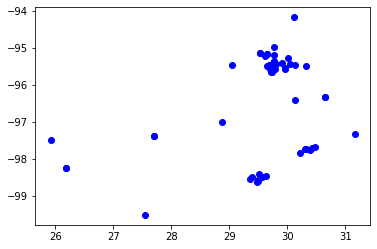

In [652]:
# PLOT represnting the Stores Coordinates
for k,v in store_cordinates.items():
    plt.scatter(v[0],v[1],c='b')

In [467]:
# Need to find how much demand needs to be supplied weekly - Aggreagating the demand Weekly

In [62]:
aggregation_functions = {'SumOfShipwght': 'sum'}
data_weekly = data_demand.groupby([data_demand['weeklyship']]).aggregate(aggregation_functions)
data_weekly.reset_index(inplace=True)
data_weekly

,weeklyship,SumOfShipwght
0,1996-12-30/1997-01-05,58578.34
1,1997-01-06/1997-01-12,171909.32
2,1997-01-13/1997-01-19,201032.87
3,1997-01-20/1997-01-26,167985.66
4,1997-01-27/1997-02-02,205277.06
5,1997-02-03/1997-02-09,219849.82
6,1997-02-10/1997-02-16,223398.20
7,1997-02-17/1997-02-23,274383.61
8,1997-02-24/1997-03-02,280742.76
9,1997-03-03/1997-03-09,226856.88


In [653]:
# So for Fixing the center Distribution Center we are making it based o the historic demand of our datasets. 
# So basically for each week we are finding the most optimum center location and then averaging out across the 33 weeks of data 
# that we have. The main reason to do that is that now it will also take into account the historic demand pattern of each store
# and not only decide the optimum location based on distance.
# we have made a logical assumption that this will be beneficial as in future also each store will follow 
# similar historical pattern becaiuse no seasonality has been obsrerved in weedkly aggregated demand data

In [64]:
# Basically the weekly_array will have a list of the weekly orders
weekly_array=[]
for i in range(len(data_weekly)):
    a=str(data_weekly['weeklyship'][i])
    weekly_array.append(a.split("/")[1])
print(len(weekly_array))

33


So in the following code basically I am finding the x-cordinates, y-coordinates, store no. and demand of each store for each week of data. This will help us to find center of gravity which will be ourt optimum location

list_weekly : basically a array of dictionary which stores each week stores and demand ordered by them


In [67]:
no_store=[]
x_store=[]
y_store=[]
w_store=[]
list_weekly=[]
for i in range(len(weekly_array)):
    xt=[]
    yt=[]
    st=[]
    wt=[]
    if i==0:
         a=data_demand[data_demand.ShipDate<weekly_array[i]].groupby("Store",as_index=False).agg({"SumOfShipwght":"sum","xcord":"mean","ycord":"mean"})
    else:
        a=data_demand[(data_demand.ShipDate<weekly_array[i])&(data_demand.ShipDate>weekly_array[i-1])].groupby("Store",as_index=False).agg({"SumOfShipwght":"sum","xcord":"mean","ycord":"mean"})
    sd={}
    for j in a.index:
        sd[a['Store'][j]]=a['SumOfShipwght'][j]
    list_weekly.append(sd)    
    for j in a.index:
        xt.append(a['xcord'][j])
        yt.append(a['ycord'][j])
        st.append(a['Store'][j])
        wt.append(a['SumOfShipwght'][j])
    x_store.append(xt)
    y_store.append(yt)
    w_store.append(wt)
    no_store.append(st)

In [802]:
list_weekly;

In [66]:
list_random_weekly=[]
for i in range(len(weekly_array)):
    dict_random_week={}
    for j in range(len(weekly_total[i])):
        dict_random_week[weekly_total[i][j]]=weekly_t[i][j]
    list_random_weekly.append(dict_random_week)

['1997-01-05',
 '1997-01-12',
 '1997-01-19',
 '1997-01-26',
 '1997-02-02',
 '1997-02-09',
 '1997-02-16',
 '1997-02-23',
 '1997-03-02',
 '1997-03-09',
 '1997-03-16',
 '1997-03-23',
 '1997-03-30',
 '1997-04-06',
 '1997-04-13',
 '1997-04-20',
 '1997-04-27',
 '1997-05-04',
 '1997-05-11',
 '1997-05-18',
 '1997-05-25',
 '1997-06-01',
 '1997-06-08',
 '1997-06-15',
 '1997-06-22',
 '1997-06-29',
 '1997-07-06',
 '1997-07-13',
 '1997-07-20',
 '1997-07-27',
 '1997-08-03',
 '1997-08-10',
 '1997-08-17']

In [ ]:
# Function to find center of gravity - center location which cosiders both distance and demand

In [445]:
# Function to find the distance across gps points
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    # r is radius of earth
    r = 3956
      
    # calculate the result
    return(c * r)

In [446]:
# Function to find center of gravity (Central Depot Location)
# its an iterative method where it keeps on itterating until previous values becomes close to the current coordinates values
def cog(x,y,w):
    a=True
    j=0
    while a:
        di=[]
        if j==0:
        #first initialization
            xi=0
            yi=0
            sa1=0
            s=0
            sb1=0
            for i in range(len(x)):
                #d=math.sqrt((x[i]-xi)**2+(y[i]-yi)**2)
                d=distance(xi,x[i],yi,y[i])
                if d==0:
                    sa1+=0
                    sb1+=0
                    s+=0
                else:
                    sa1+=(w[i]*x[i])/d
                    s+=w[i]/d
                    sb1+=(w[i]*y[i])/d
            
            xt=sa1/s
            yt=sb1/s
            if abs(xt-xi)<0.001 and abs(yt-yi)<0.001:
                a=False
            else:
                xi=xt
                yi=yt
            j+=1
        else:
        
            sa1=0
            s=0
            sb1=0
            for i in range(len(x)):
                #d=math.sqrt((x[i]-xi)**2+(y[i]-yi)**2)
                d=distance(xi,x[i],yi,y[i])
                if d==0:
                    sa1+=0
                    sb1+=0
                    s+=0
                else:
                    sa1+=(w[i]*x[i])/d
                    s+=w[i]/d
                    sb1+=(w[i]*y[i])/d
            
            xt=sa1/s
            yt=sb1/s
            if abs(xt-xi)<0.001 and abs(yt-yi)<0.001:
                a=False
            else:
                xi=xt
                yi=yt
            j+=1
    return xt,yt

In [102]:
for i in range(len(data_weekly)):
    x_list=[]
    y_list=[]
    a,b=cog( x_store[i], y_store[i],w_store[i])
    x_list.append(a)
    y_list.append(b)

In [103]:
#Final Center location
x_final=np.mean(x_list)
y_final=np.mean(y_list)

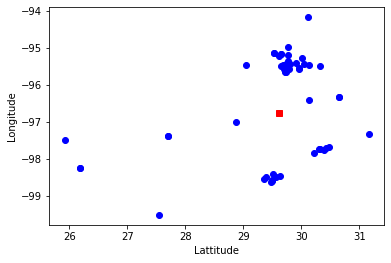

In [469]:
# Plotting stores coordinates with centrqal location also included
plt.plot(x_final,y_final,c='r',marker='s')
plt.xlabel('Lattitude')
plt.ylabel("Longitude")
for k,v in store_cordinates.items():
    plt.scatter(v[0],v[1],c='b')

## Grenerating Linearly Interpolated Emperical CDF

As our demand is continously varying across 33 weeks, we are performing trace driven simulation. But it will be better to test/ design our model based on varying demand. For this reason we have created random data from our histroical data for each store using Linearly interpolated empirical CDF.

In [72]:
dict_IECDF={}
for i in n_stores:
    dict_IECDF[i]=list(data_demand['SumOfShipwght'][data_demand['Store']==i])

In [73]:
def invert_iecdf(u, mydata):
    n = len(mydata)
    # u will lie in some subinterval between two values of [0, 1/(n-1), 2/(n-1), ..., (n-2)/(n-1), 1].
    # Get index of left breakpoint: in {0, 1, 2, ..., n-3, n-2}.
    lbp = int(np.floor(u*(n-1)))
    # Invert the line segment from (x_lbp, lbp) to (x_{lbp+1}, lbp+1)
    x = mydata[lbp] + (mydata[lbp+1] - mydata[lbp])*(u*(n-1) - lbp)
    return x

In [470]:
# to find the no. of times each store has ordered in the historical 33 weeks of tdata that we have with us
# we have created a dictionary with stores as key and no. of times they ordered in 33 weeks as value.
# Note that the counting of frequency of order is being done on aggrgated data which means that if a store has ordered
# multiple times in each week it is combined to one single order
store_count={}
for i in n_stores:
    c=0
    for j in range(len(list_weekly)):
        for k in list_weekly[j].keys():
            if k==i:
                c+=1
    store_count[i]=c

In [75]:
i=0
dict_store_ecdf={}
for j in n_stores:
    i=0
    d_store_cdf=[]
    # basically we are finding demand for whole year
    while i!= 52:
        x=random.random()
        # basically its similar to coin throw. If this random number btw 0 and 1 is less than the robability that store will
        #order as calculated previously then that means stores is ordering this time also.
        prob=store_count[j]/33
        if x<=prob:
            uniforms = ss.uniform.rvs(size=1)
            my_rvs = [invert_iecdf(u,np.sort(dict_IECDF[j])) for u in uniforms]
        else:
            my_rvs=0
        d_store_cdf.append(my_rvs)
        i+=1
    
    dict_store_ecdf[j]=d_store_cdf

In [76]:
print((dict_store_ecdf[28]))

[[937.6274475797356], [977.4249650582276], [287.6777522161305], [580.4598692679897], [635.668189585233], [305.5817948481119], [1075.5579674372252], [2427.8375147030333], [326.9084091334081], [974.9981951758209], 0, [1491.7031767707686], [490.8835516704175], 0, [442.14807384336973], [863.2161921191478], [2162.4650249885144], [1059.6763091506994], [976.8739434419457], [547.5575185737285], [598.2212677379335], [541.4949265391934], [1974.0820878259087], [299.458072543702], [970.8564644101261], [284.4667874346178], 0, [616.2655838702512], 0, [21.33696589133573], [1651.118291394742], [580.2449462970824], 0, [613.9985798114546], [944.8879878279773], [590.6312899893095], [40.21939085903435], [408.1876259117289], 0, [605.1898863784334], 0, [638.4324639354678], [1777.7698229032746], [609.4941464488252], [79.84325260785222], [310.0486921446687], [954.0716345329347], 0, [928.6698752669071], [577.1549288452042], [332.1619183420253], 0]


In [803]:
#weekly_total_stores is basically which all stores are ordering in each week
weekly_total=[]
for i in range(52):
    weekly_orders=[]
    for j in n_stores:
        
        if dict_store_ecdf[j][i]!=0:
            weekly_orders.append(j)
    weekly_total.append((weekly_orders))
weekly_total;

In [79]:
# Weekly_t is basically the demand of the stores that are ordering each week
weekly_t=[]
for i in range(52):
    weekly_ordering=[]
    for j in weekly_total[i]:
        weekly_ordering.append(dict_store_ecdf[j][i][0])
    weekly_t.append(weekly_ordering)

In [80]:
print(len(weekly_t[0]))
print((weekly_total[0][10]))

45
1348


In [81]:
list_random_weekly=[]
for i in range(52):
    dict_random_week={}
    for j in range(len(weekly_total[i])):
        dict_random_week[weekly_total[i][j]]=weekly_t[i][j]
    list_random_weekly.append(dict_random_week)

In [804]:
list_random_weekly;

##  Linear Programming

In [83]:
# Function to find the distance across gps points
from math import radians, cos, sin, asin, sqrt
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 3956
      
    # calculate the result
    return(c * r)

In [84]:
###########################################
# xb is basically a dictuionary where keys are stores and coordinates as tuple are values
###########################################
xb={}
xb[0]=(x_final,y_final)
for i in store_coord.index:
    xb[store_coord['Store'][i]]=(store_coord['X'][i],store_coord['Y'][i])
xb

{0: (29.587825237308426, -96.8348894279114),
 28: (30.658171, -96.32664),
 95: (30.1187525971233, -94.1645782716926),
 97: (29.779765, -94.97617),
 103: (30.6587463875974, -96.3260402973796),
 137: (29.04209, -95.4559),
 232: (30.3276407529608, -95.4800076618895),
 282: (28.8742139031099, -96.9960437526832),
 1005: (29.9636455635175, -95.5472111992433),
 1006: (30.131633935451, -95.444956043976),
 1007: (29.6479018455556, -95.1580007918594),
 1036: (29.476107763925, -98.6118590876081),
 1340: (29.637391037644, -98.4568466600574),
 1341: (26.1902206936441, -98.2336316889658),
 1344: (29.9116014787026, -95.4133066759524),
 1346: (31.167251746846, -97.3204353600223),
 1348: (25.9200443775092, -97.4852530416582),
 1351: (29.7330669578548, -95.6403154643103),
 1373: (29.3554841428781, -98.5441960587754),
 1401: (29.4899113645989, -98.5482294280893),
 1409: (29.6881377564115, -95.455710358768),
 1411: (29.5357381665539, -95.1346975434299),
 1421: (29.7706785231928, -95.3454387177251),
 1422:

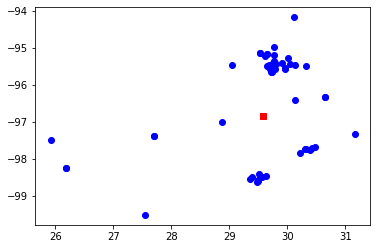

In [85]:
n=len(n_stores)
xc_s=[i[0] for i in store_cordinates.values()]
yc_s=[i[1] for i in store_cordinates.values()]
xf = np.insert(xc_s,0,x_final)
yf = np.insert(yc_s,0,y_final)
plt.plot(xf[0], yf[0], c='r', marker='s')
plt.scatter(xf[1:], yf[1:], c='b')

In [471]:
# For linear Programming
# I have to pass to integer values from o to 1, thats why 
# I am creating a second dictiomnary in which keys are set as 0, 1, to 50 and values are specific store,xcord,ycord as tuple

In [87]:
dict_s_lp={}
dict_s_lp[0]=(0,x_final,y_final)
for i in store_coord.index:
    dict_s_lp[i+1]=(store_coord['Store'][i],store_coord['X'][i],store_coord['Y'][i])
dict_s_lp

{0: (0, 29.587825237308426, -96.8348894279114),
 1: (28, 30.658171, -96.32664),
 2: (95, 30.1187525971233, -94.1645782716926),
 3: (97, 29.779765, -94.97617),
 4: (103, 30.6587463875974, -96.3260402973796),
 5: (137, 29.04209, -95.4559),
 6: (232, 30.3276407529608, -95.4800076618895),
 7: (282, 28.8742139031099, -96.9960437526832),
 8: (1005, 29.9636455635175, -95.5472111992433),
 9: (1006, 30.131633935451, -95.444956043976),
 10: (1007, 29.6479018455556, -95.1580007918594),
 11: (1036, 29.476107763925, -98.6118590876081),
 12: (1340, 29.637391037644, -98.4568466600574),
 13: (1341, 26.1902206936441, -98.2336316889658),
 14: (1344, 29.9116014787026, -95.4133066759524),
 15: (1346, 31.167251746846, -97.3204353600223),
 16: (1348, 25.9200443775092, -97.4852530416582),
 17: (1351, 29.7330669578548, -95.6403154643103),
 18: (1373, 29.3554841428781, -98.5441960587754),
 19: (1401, 29.4899113645989, -98.5482294280893),
 20: (1409, 29.6881377564115, -95.455710358768),
 21: (1411, 29.535738166

In [88]:
# In this method I am assigning each store as equal Priority 

In [362]:
def lp(q_v,dict_s_lp,N,V,A,c,w,q):
    Q = q_v

    from gurobipy import Model, GRB, quicksum
    mdl=Model('CVRP')
    x = mdl.addVars(A, vtype=GRB.BINARY)
    u = mdl.addVars(N, vtype=GRB.CONTINUOUS)
    mdl.modelSense = GRB.MINIMIZE
    # Objective Function
    mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))
    # Description of Constarints are added in the report
    mdl.addConstrs(quicksum(x[i, j] for j in V if j != i) == 1 for i in N)
    mdl.addConstrs(quicksum(x[i, j] for i in V if i != j) == 1 for j in N)
    mdl.addConstrs((x[i, j] == 1) >> (u[i]+q[j] == u[j])
                   for i, j in A if i != 0 and j != 0)
    mdl.addConstrs(u[i] >= q[i] for i in N)
    mdl.addConstrs(u[i] <= Q for i in N)
    mdl.Params.MIPGap = 0.1
    mdl.Params.TimeLimit = 60 # seconds
    mdl.optimize()
    active_arcs = [a for a in A if x[a].x > 0.99]
    for i, j in active_arcs:
        plt.plot([xf[i], xf[j]], [yf[i], yf[j]], c='g', zorder=0)
    plt.plot(xf[0], yf[0], c='r', marker='s')
    plt.scatter(xf[1:], yf[1:], c='b')
    
    def findTuple(elem):
        for t in arcsDelivery:
            if t[0]==elem:
                return t
        return None

    arcsDelivery = active_arcs

    routesDelivery = []

    startRoutes = len(list(filter(lambda elem: elem[0]==0, arcsDelivery)))

    for i in range(startRoutes):
        tempList = []
        currentTuple = arcsDelivery[i]
        tempList.append(currentTuple[0])
        tempList.append(currentTuple[1])
        while True:
            if currentTuple[1]==0:
                break
            else:
                nextTuple = findTuple(currentTuple[1])
                currentTuple = nextTuple
                tempList.append(currentTuple[1])
        routesDelivery.append(tempList)
#     s=routesDelivery\
#     return s
    return routesDelivery

In [363]:
# converts the integer values 0,1,..... 50 back to store number for our reference using above created dictionary
def route_conv(z):
    route_n=[]
    for i in z:
        route=[]
        for j in i:
            route.append(dict_s_lp[j][0])
        route_n.append(route)
    return route_n 

In [364]:
# function to find the distance from a particular route
def dist_finder(l):
    dx=0
    for i in range(len(l)-1):
        dx+=distance(xb[l[i]][0],xb[l[i+1]][0],xb[l[i]][1],xb[l[i+1]][1])
    return dx

In [365]:
# y_nt represents the distance travelled each time, Assuming Vehicle needs to complete full route before coming back.
# c_nt represents the truck capcity required for esach week
# count_s represents the actual no. of stores that it visited
# x_sw represents the list of stores that it should have visited because they are in that particular route

def scenario_measure(r,dist_x,list_week_data):
    y_nt=[]
    c_nt=[]
    count_s=[]
    x_sw=[]
    list_weekly=list_week_data
    for b in list_weekly:
        y=[]
        c_n=[]
        count_t=[]
        x_sr=[]
        for i in range(len(r)):
            c=0
            t_cap=40000
            count=0
            x_s=[]
            for k,v in b.items():
                if k in r[i]:
                    x_s.append(k)
                    c+=v
                    if t_cap-v>0:
                        t_cap=max(0,t_cap-v)
                        count+=1
            #x_sr.append(x_s)
            x_sr.append(len(x_s))
            count_t.append(count)  
            y.append(dist_x[i])
            c_n.append(c)

        x_sw.append(x_sr)    
        y_nt.append(y)
        c_nt.append(c_n)
        count_s.append(count_t)
    return x_sw,y_nt,c_nt,count_s
    #Now to calculate the average performance measure for routes
    
    # Cost calculation ##
    # previously i calculated cost only oin the basis of the distance but now we need to include the tradeff btw stockouts 
    # and including extra truck. Also if we include the stopping time for each truck for unloading to be 30 mins. 
    # And for unloading workers are poaid extra 30 $ per hour because of heavy lifting.

In [799]:
# Cost
# Extra Trck COST - 250
# Average of 30 minutes spend unloading at each stop - salary 30 $ because of heavy lifting
# Cost of stockouts - 500


In [366]:
def cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost):
    unmet_stores = np.array(stores_in_routes)-np.array(no_stores_visit)
    unmet_demand = Capacity_req
    for i in range(len(unmet_demand)):
        for j in range(len(unmet_demand[i])):
            unmet_demand[i][j]=max(0,unmet_demand[i][j]-40000)
    cost_final_arr=[]
    for i in range(len(unmet_stores)):
        cost_arr=[]
        for j in range(len(unmet_stores[i])):
            # cost including time
            if unmet_stores[i][j]!=0:
                #3.25 means 3 cost of fuel/mile, 0.25 is operating cost per mile
                cost1=250*((unmet_demand[i][j]//40000)+1)+3.25*dist_trav[i][j]+(unmet_stores[i][j]+no_stores_visit[i][j])*(0.5*30) 
                cost2=unmet_stores[i][j]*500 + no_stores_visit[i][j]*0.5*30
                cost_final=cost+min(cost1,cost2)
#                 if cost2<cost1:
#                     final_st.append(x[i])
#                 else:
#                     x[i]=0
#                     final_st.append(x[i])
            else:
                cost_final=cost+no_stores_visit[i][j]*0.5*30
            cost_arr.append(cost_final)
        cost_final_arr.append(np.mean(cost_arr))
    stores_missed=[]
    for i in unmet_stores:
        stores_missed.append(np.sum(i))
        
    return cost_final_arr,stores_missed

In [367]:
def ci(x):
    con_int=[]
    for i in range(len(x)):
        A_CI = ss.norm.interval(alpha=0.95, loc = np.mean(x[i]), scale =
                                np.std(x[i])/math.sqrt(len(x[i])))
        con_int.append((A_CI[1]-A_CI[0])/2)
    return con_int

### Scenario 1 - No Priority, Original Data

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0xb9941e3e
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 204 rows and 2703 columns
Presolve time: 1.04s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 1.05 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 10547.8 

Optimal solution found (tolerance 1.00e-01)
Best objective 1.054778822961e+04, best bound 1.054778

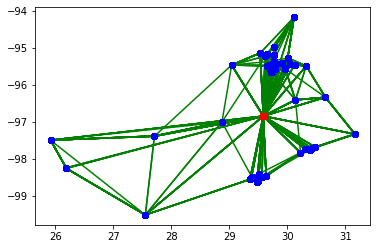

In [368]:
truck_cost=75
cost_routes_np_og=[]
stores_routes_np_og=[]
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)] # No. of Nodes
    V = [0] + N                 # No. of Vertices 
    A = [(i, j) for i in V for j in V if i != j] # No. of Possible Arcs
    # Associated cost which is basically distance in our case
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    # weights assigned -  to each stores
    w = np.ones(len(dict_s_lp)-1)
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_np_og.append((cost_final))
    stores_routes_np_og.append(avg_stores_missed)


In [369]:
cost_routes_np_og;

In [370]:
stores_routes_np_og;

In [371]:
expected_cost_np_og=[]
expected_stores_np_og=[]
for i in range(len(stores_routes_np_og)):
    expected_cost_np_og.append(np.mean(cost_routes_np_og[i]))
    expected_stores_np_og.append((np.mean(stores_routes_np_og[i])))

<ErrorbarContainer object of 3 artists>

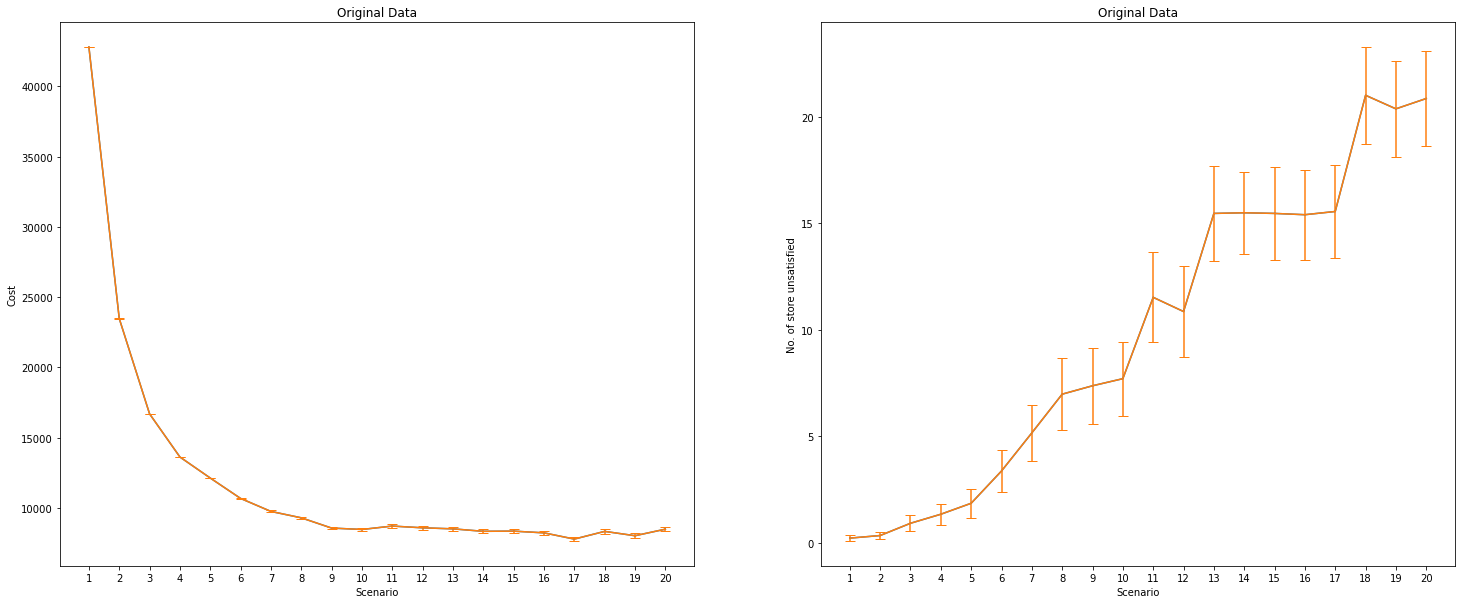

In [752]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
n=[i+1 for i in range(len(expected_cost_np_og))]
ax1.plot(n,expected_cost_np_og)
yo=ci(cost_routes_np_og)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_np_og,yerr=yo,capsize=5)
ax1.set_title('Original Data')
ax1.set_xlabel('Scenario')
ax1.set_ylabel('Cost')
ax2.plot(n,expected_stores_np_og)
yo=ci(stores_routes_np_og)
ax2.set_title('Original Data')
ax2.set_xlabel('Scenario')
ax2.set_ylabel('No. of store unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_np_og,yerr=yo,capsize=5)


In [482]:
# For the sake of Easier comparison i am superimposing the plot over each other

<ErrorbarContainer object of 3 artists>

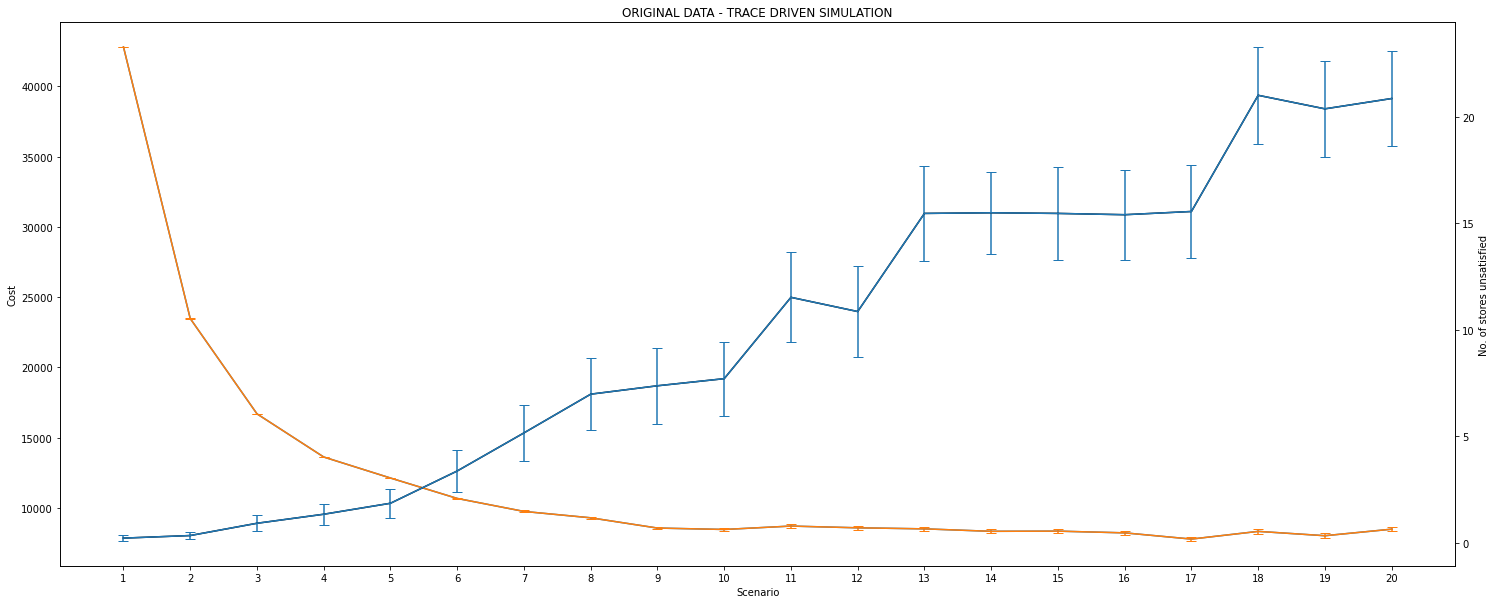

In [756]:
fig, (ax1) = plt.subplots(1,1,figsize = (25,10))
n=[i+1 for i in range(len(expected_cost_np_og))]
ax1.plot(n,expected_cost_np_og)
yo=ci(cost_routes_np_og)
ax1.set_xticks(n)
ax1.set_title("ORIGINAL DATA - TRACE DRIVEN SIMULATION")
ax1.set_xlabel("Scenario")
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_np_og,yerr=yo,capsize=5)
ax2=ax1.twinx()
ax2.set_ylabel('No. of stores unsatisfied')
ax2.plot(n,expected_stores_np_og,color='k')
yo=ci(stores_routes_np_og)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_np_og,yerr=yo,capsize=5)

In [373]:
expected_cost_np_og[9]  # Scenario 10

8457.101061119567

In [655]:
expected_stores_np_og[9]

7.696969696969697

We performed trace driven solution using our historical datset, and find the most optimum route and associated operating cost for it. We have simulated across 20 scenarios, in each scenario I am limiting no. of stores that a truck can visit. For example scenario 10 which means maximum of 10 stores are only allowed in truck. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. So only 10 scenarios are left which are between 1 and 10.

Also from the graph we can see that the cost increases rapidly below the scnario 8, thats why we eliminated all those scenarios as well.
From these remaning scenarios as per our anslysis the optimum cost is at scenario 10 (max 10 stores allowed in each route) which is 8457.101061119567 $. Because from the plot we can see that there is very small variation (decrease in no. of stores being missed out) in scenario 8,9,10. But there is considerable difference in associated cost in these scenarios.


#### Scenario - 2 Random Data Without Priority

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0xb9941e3e
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 204 rows and 2703 columns
Presolve time: 1.27s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 1.28 seconds
Thread count was 1 (of 16 available processors)

Solution count 1: 10547.8 

Optimal solution found (tolerance 1.00e-01)
Best objective 1.054778822961e+04, best bound 1.054778

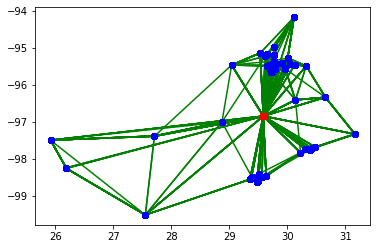

In [374]:
truck_cost=75
cost_routes_np_rd=[]
stores_routes_np_rd=[]
a=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_np_rd.append(cost_final)
    stores_routes_np_rd.append(avg_stores_missed)

In [375]:
stores_routes_np_rd;

In [376]:
cost_routes_np_rd;

In [377]:
expected_cost_np_rd=[]
expected_stores_np_rd=[]
for i in range(len(stores_routes_np_og)):
    expected_cost_np_rd.append(np.mean(cost_routes_np_rd[i]))
    expected_stores_np_rd.append((np.mean(stores_routes_np_rd[i])))

In [656]:
expected_cost_np_rd;

<ErrorbarContainer object of 3 artists>

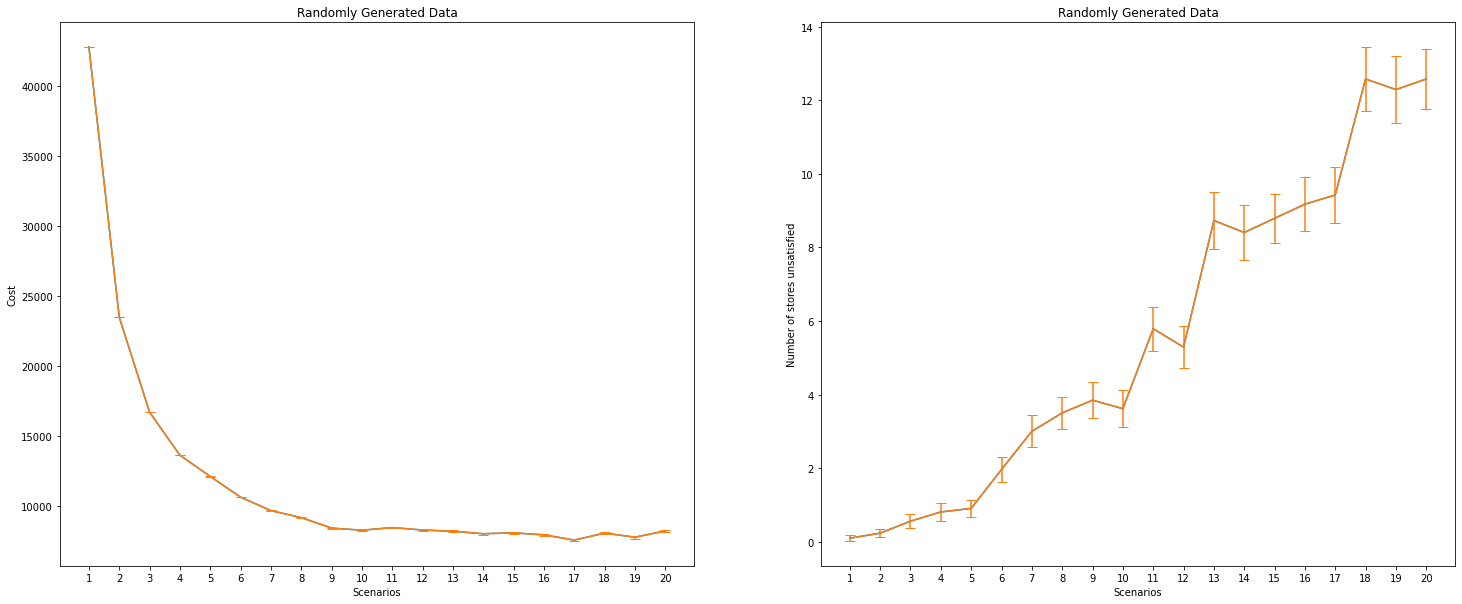

In [758]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
n=[i+1 for i in range(len(expected_cost_np_rd))]
ax1.plot(n,expected_cost_np_rd)
ax1.set_title('Randomly Generated Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
yo=ci(cost_routes_np_rd)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_np_rd,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_np_rd)
yo=ci(stores_routes_np_rd)
ax2.set_title('Randomly Generated Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_np_rd,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

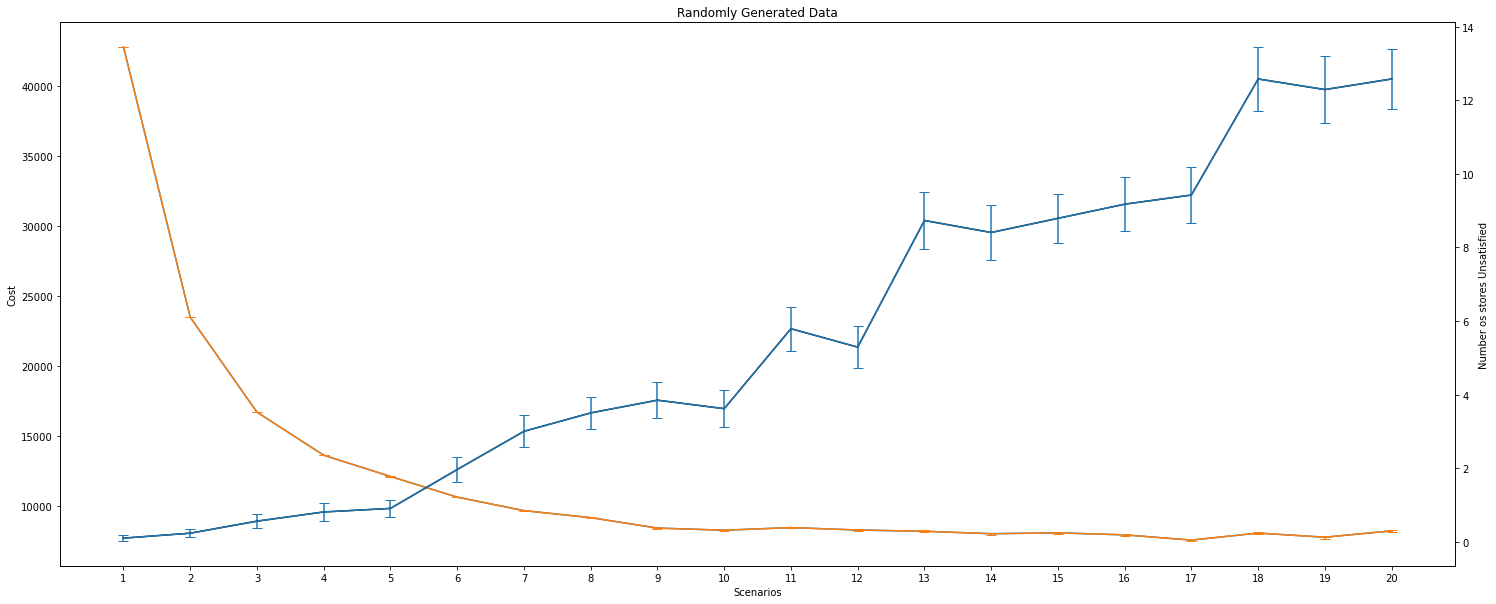

In [760]:
fig, (ax1) = plt.subplots(1,1,figsize = (25,10))
n=[i+1 for i in range(len(expected_cost_np_rd))]
ax1.plot(n,expected_cost_np_rd)
yo=ci(cost_routes_np_rd)
ax1.set_xticks(n)
ax1.set_title('Randomly Generated Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_np_rd,yerr=yo,capsize=5)
ax2=ax1.twinx()
ax2.plot(n,expected_stores_np_rd,color='k')
ax2.set_ylabel('Number os stores Unsatisfied')
yo=ci(stores_routes_np_rd)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_np_rd,yerr=yo,capsize=5)

In [661]:
(expected_stores_np_rd[9])

3.6153846153846154

In [660]:
(expected_cost_np_rd[9])

8233.676388658194

 Using linearly Interpolated IECDF dataset we find the most optimum route and associated operating cost for it. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. So only 3 scenarios are eliminated (scenario 18, scenario 19, scenario 20 are removed).

Also from the graph we can see that the cost increases rapidly below the scenario 9 without significant decrease in no. of stores being stocked out, thats why we eliminated all those scenarios as well.
From these remaning scenarios we can see that there is very large variation (decrease in no. of stores being missed out) in scenario 9,10,11 compared to scenarios 13,14,15,16. But there is only small difference in associated cost in these scenarios. Therefore out of scenario 9, 10 and 11 least cost is at scenrio 10. So as per our analysis the optimum scenario is at scenario 10 which has associated cost of 8233.676388658194 $. 


### Priority Wise

In [463]:
##################################################################
############## Priority Wise Group ###############################
##################################################################

# Using Pareto Principle, assigning top 20% of the stores to the Higher Priority

In [383]:
list_weekly;
c_try_og=[]
for j in n_stores:
    d=0
    for i in range(len(list_weekly)):
        for k,v in list_weekly[i].items():
            if k==j:
                d+=list_weekly[i][j]
    c_try_og.append((j,d))

In [384]:
c_try_og.sort(key=lambda x:x[1],reverse=True)
c_try_og;

In [434]:
top_l=[]
bottom_l=[]
# Using Pareto Principle I am splitting datasets into 20% and 80%.
for i in range(len(c_try_og)):
    if i<10:
        top_l.append(c_try_og[i][0])
    else:
        bottom_l.append(c_try_og[i][0])

In [435]:
len(w)

51

As we are assigning higher priority to the stores (top 20% of the stores with the highest demand) we are observinbg that this leads to reduced operating cost and also leads to reduction in the no. of stores being stocked out. This observations makes sense also because if a higher priority store is in a route implies that the maximum number of stores in a route will reduced. Because of which chances of stockout occuring will reduce and thus will reduce our overall cost. (Because cost with nmet demand is >>> than cost associated with satisfied demand)

###### Assigning Priority 2

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0x82575de6
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve added 1518 rows and 0 columns
Presolve removed 0 rows and 940 columns
Presolve time: 0.21s
Presolved: 1722 rows, 1763 columns, 8282 nonzeros
Variable types: 41 continuous, 1722 integer (1722 binary)
Found heuristic solution: objective 10547.788230

Root relaxation: objective 2.787057e+03, 203 iterations, 0.02 seconds

    No

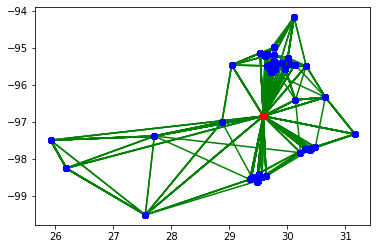

In [451]:
truck_cost=75
cost_routes_p2_rd=[]
stores_routes_p2_rd=[]
a=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    for i in range(len(dict_s_lp)):
        for j in top_l:
            if dict_s_lp[i][0]==j:
                w[i]=2
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_p2_rd.append((cost_final))
    stores_routes_p2_rd.append(((avg_stores_missed)))


In [452]:
expected_cost_p2_rd=[]
expected_stores_p2_rd=[]
for i in range(len(stores_routes_p2_rd)):
    expected_cost_p2_rd.append(np.mean(cost_routes_p2_rd[i]))
    expected_stores_p2_rd.append((np.mean(stores_routes_p2_rd[i])))


In [600]:
expected_cost_p2_rd;

<ErrorbarContainer object of 3 artists>

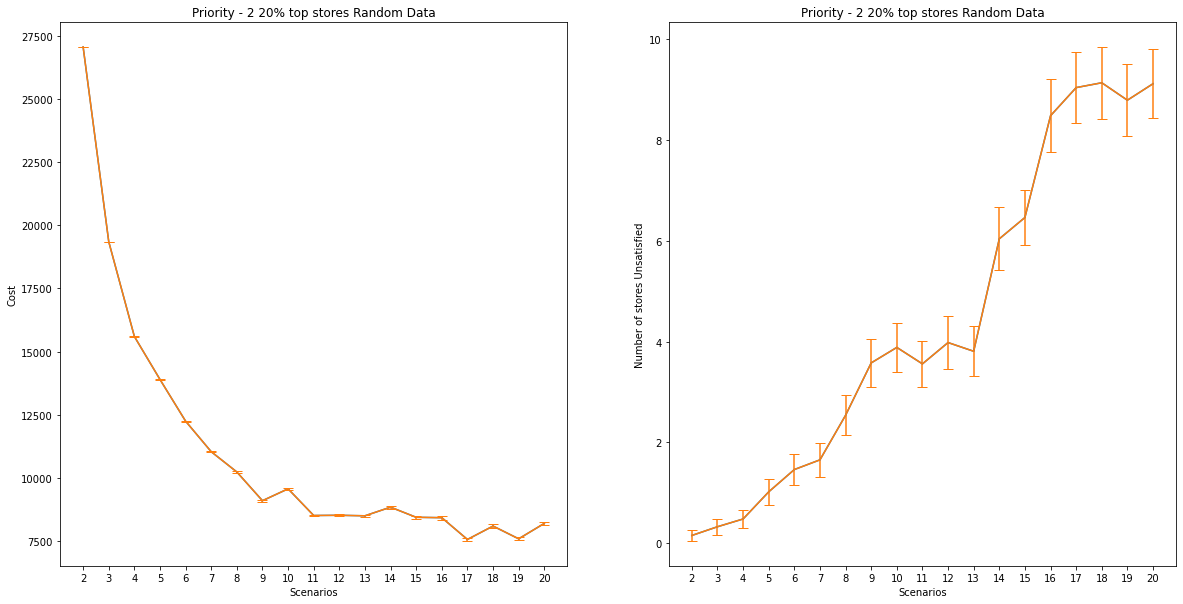

In [761]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
n=[i+2 for i in range(len(expected_cost_p2_rd))]
ax1.plot(n,expected_cost_p2_rd)
yo=ci(cost_routes_p2_rd)
ax1.set_xticks(n)
ax1.set_title('Priority - 2 20% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_p2_rd,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_p2_rd)
yo=ci(stores_routes_p2_rd)
ax2.set_title('Priority - 2 20% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores Unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p2_rd,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

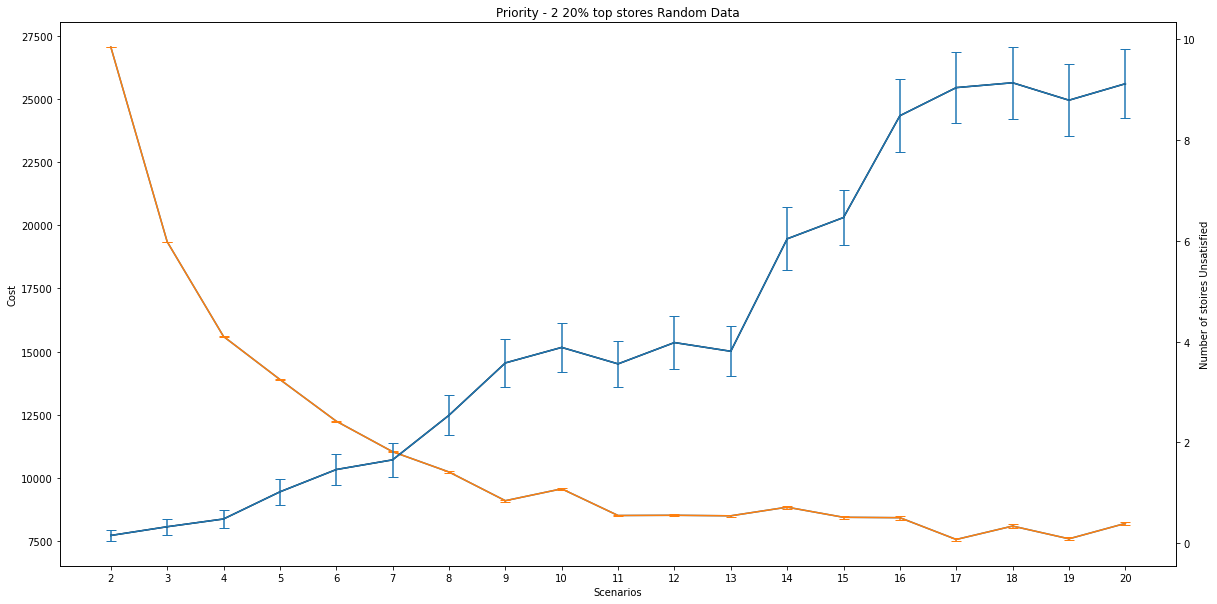

In [763]:
fig, (ax1) = plt.subplots(1,1,figsize = (20,10))
n=[i+2 for i in range(len(expected_cost_p2_rd))]
ax1.plot(n,expected_cost_p2_rd)
yo=ci(cost_routes_p2_rd)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_p2_rd,yerr=yo,capsize=5)
ax2 = ax1.twinx()
ax2.plot(n,expected_stores_p2_rd,color='k')
yo=ci(stores_routes_p2_rd)
ax1.set_title('Priority - 2 20% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax2.set_ylabel('Number of stoires Unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p2_rd,yerr=yo,capsize=5)

In [662]:
expected_cost_p2_rd[9]

8512.230513614173

In [663]:
expected_stores_p2_rd[9]

3.5576923076923075

Using linearly Interpolated IECDF dataset we find the most optimum route and associated operating cost for it. We have assigned top ten stores to higher Priority of 2. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. 

So here none of the stores being missed out are more than 10. From these remaning scenarios the optimum cost is at scenario 17 (max 17 weights allowed in one route what this means that some stores ahve a higher weight 2 so the actual no. of stores may be less than 17). But it has not that practical to have so many stores in one particular route also we can see that in scenario 11,12,13 there is not much difference in cost but there is considerable decrease in no. of stores being stockout (from around 9 to less than 4). Also below scenario 11 the cost is increasing rapidly. Thats why we are eliminating all those scenarios. Based on our analysis scenario 11 is is optimum which has associated cost of 8512.230513614173 $

##### Assigning Priority 3

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0xf0e90b68
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve added 3948 rows and 0 columns
Presolve removed 0 rows and 135 columns
Presolve time: 0.40s
Presolved: 4152 rows, 2568 columns, 24756 nonzeros
Variable types: 846 continuous, 1722 integer (1722 binary)

Root relaxation: objective 2.763884e+03, 142 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bou

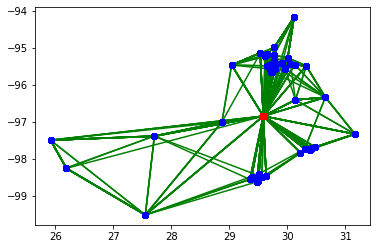

In [454]:
truck_cost=75
cost_routes_p3_rd=[]
stores_routes_p3_rd=[]
a=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    for i in range(len(dict_s_lp)):
        for j in top_l:
            if dict_s_lp[i][0]==j:
                w[i]=3
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_p3_rd.append((cost_final))
    stores_routes_p3_rd.append(((avg_stores_missed)))


In [455]:
expected_cost_p3_rd=[]
expected_stores_p3_rd=[]
for i in range(len(stores_routes_p3_rd)):
    expected_cost_p3_rd.append(np.mean(cost_routes_p3_rd[i]))
    expected_stores_p3_rd.append((np.mean(stores_routes_p3_rd[i])))

In [491]:
expected_cost_p3_rd

[21568.004237755595,
 16969.898680512324,
 14982.784775854434,
 12881.953956018213,
 11682.701944917819,
 10987.516959665263,
 10407.921027938506,
 10216.849453615705,
 9250.222703033478,
 9116.366575958533,
 8889.637257070848,
 9164.250427612089,
 8545.848952639162,
 8689.327066711185,
 8260.308552989267,
 8139.212969391339,
 8277.77386209131,
 8479.262349343855]

<ErrorbarContainer object of 3 artists>

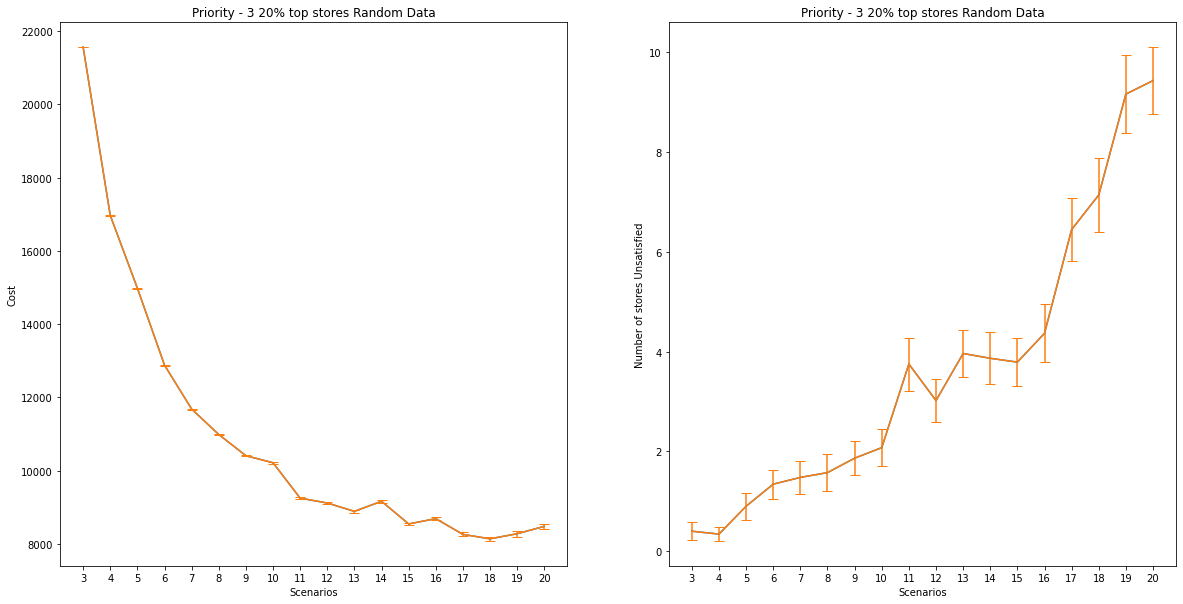

In [765]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
n=[i+3 for i in range(len(expected_cost_p3_rd))]
ax1.plot(n,expected_cost_p3_rd)
ax1.set_title('Priority - 3 20% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
yo=ci(cost_routes_p3_rd)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_p3_rd,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_p3_rd)
ax2.set_title('Priority - 3 20% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores Unsatisfied')
yo=ci(stores_routes_p3_rd)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p3_rd,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

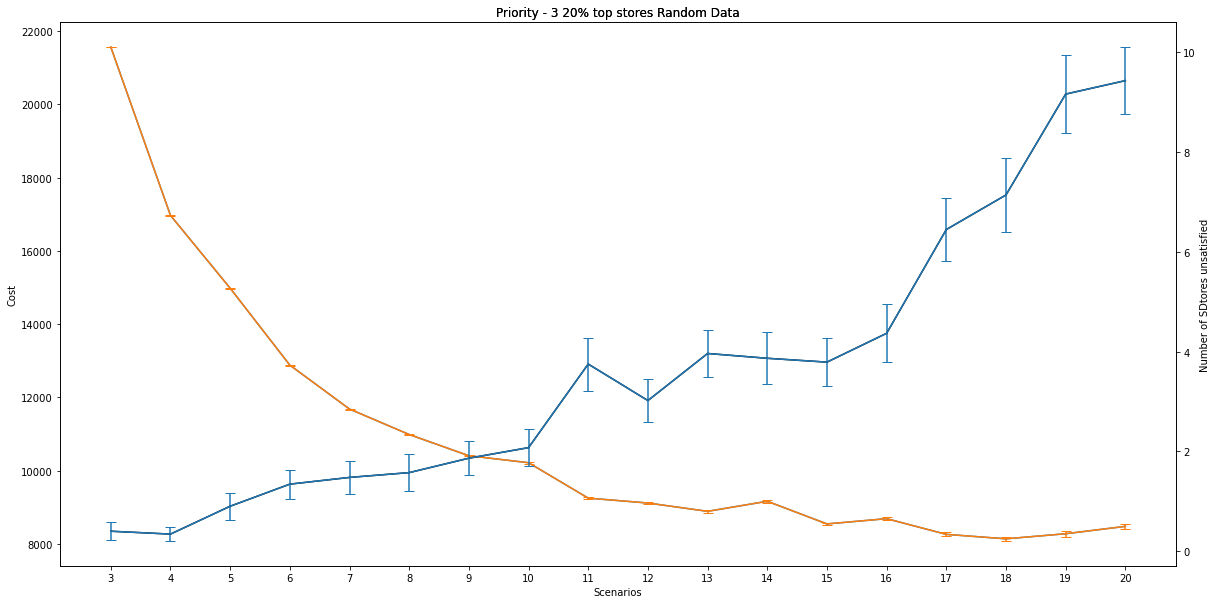

In [766]:
fig, (ax1) = plt.subplots(1,1,figsize = (20,10))
n=[i+3 for i in range(len(expected_cost_p3_rd))]
ax1.plot(n,expected_cost_p3_rd)
yo=ci(cost_routes_p3_rd)
ax1.set_xticks(n)
ax1.set_title('Priority - 3 20% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_p3_rd,yerr=yo,capsize=5)
ax2=ax1.twinx()
ax2.set_title('Priority - 3 20% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of SDtores unsatisfied')
ax2.plot(n,expected_stores_p3_rd,color='k')
yo=ci(stores_routes_p3_rd)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p3_rd,yerr=yo,capsize=5)

In [664]:
expected_cost_p3_rd[9]

9116.366575958533

In [666]:
expected_stores_p3_rd[9]

3.019230769230769

Using linearly Interpolated IECDF dataset we find the most optimum route and associated operating cost for it. We have assigned top ten stores to higher Priority of 3. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. 

So here none of the stores being missed out are more than 10. From these remaning scenarios the optimum cost is at scenario 18 (max 18 weights allowed in one route what this means that some stores have a higher weight 3 so the actual no. of stores may be less than 18). But it has not that practical to have so many stores in one particular route also we can see that if we consider scenarios like 11,12,13,14,15 there is significant refduction in stores being stockout with very small increase in cost. Also beyond 11 the cost is increasing rapidly. From our analysis we choosed 12 as the optimum scenario with associated cost of 9116.366575958533.

###### Priority 5

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0x54c6040d
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve added 3948 rows and 0 columns
Presolve removed 0 rows and 135 columns
Presolve time: 0.11s
Presolved: 4152 rows, 2568 columns, 24756 nonzeros
Variable types: 846 continuous, 1722 integer (1722 binary)

Root relaxation: objective 2.745012e+03, 133 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bou

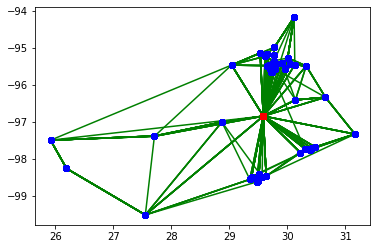

In [772]:
truck_cost=75
cost_routes_p5_rd=[]
stores_routes_p5_rd=[]
a=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    for i in range(len(dict_s_lp)):
        for j in top_l:
            if dict_s_lp[i][0]==j:
                w[i]=5
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_p5_rd.append((cost_final))
    stores_routes_p5_rd.append(((avg_stores_missed)))


In [773]:
expected_cost_p5_rd=[]
expected_stores_p5_rd=[]
for i in range(len(stores_routes_p5_rd)):
    expected_cost_p5_rd.append(np.mean(cost_routes_p5_rd[i]))
    expected_stores_p5_rd.append((np.mean(stores_routes_p5_rd[i])))

<ErrorbarContainer object of 3 artists>

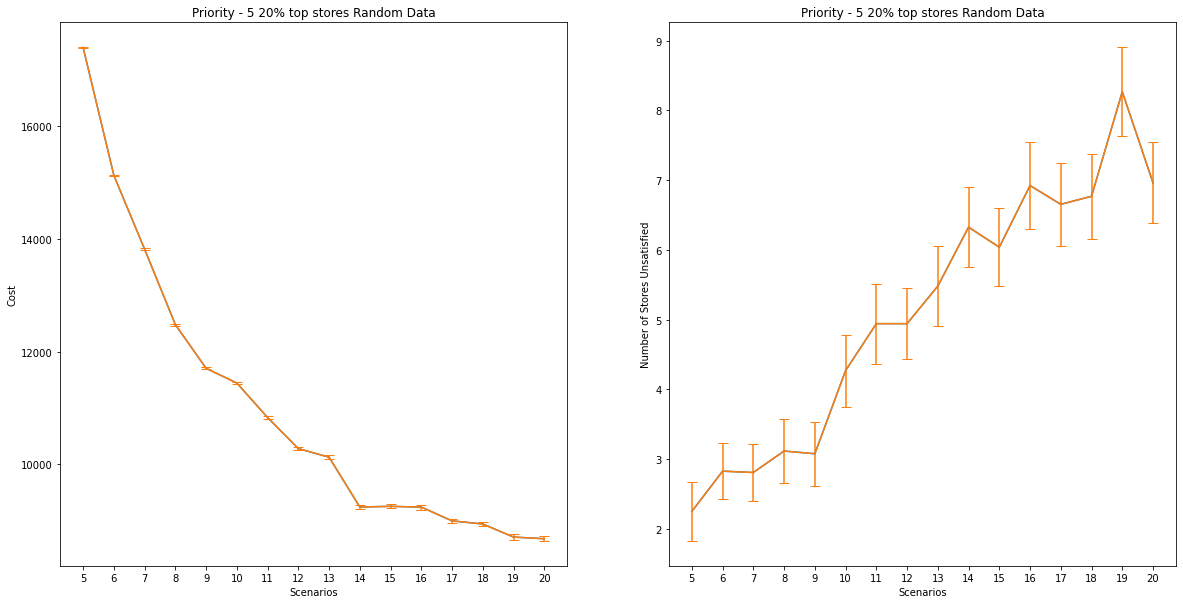

In [774]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (20,10))
n=[i+5 for i in range(len(expected_cost_p5_rd))]
ax1.plot(n,expected_cost_p5_rd)
yo=ci(cost_routes_p5_rd)
ax1.set_xticks(n)
ax1.set_title('Priority - 5 20% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_p5_rd,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_p5_rd)
yo=ci(stores_routes_p5_rd)
ax2.set_title('Priority - 5 20% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of Stores Unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p5_rd,yerr=yo,capsize=5)

In [775]:
expected_stores_p5_rd

[2.25,
 2.826923076923077,
 2.8076923076923075,
 3.1153846153846154,
 3.076923076923077,
 4.269230769230769,
 4.9423076923076925,
 4.9423076923076925,
 5.480769230769231,
 6.326923076923077,
 6.038461538461538,
 6.923076923076923,
 6.653846153846154,
 6.769230769230769,
 8.26923076923077,
 6.961538461538462]

In [776]:
expected_cost_p5_rd

[17395.180074542066,
 15125.07019807043,
 13815.242655470562,
 12478.174541844994,
 11703.21812850136,
 11441.316402440043,
 10829.172489220042,
 10277.87857081193,
 10125.616348498517,
 9241.490438807066,
 9253.729808787879,
 9239.820391399042,
 8995.989969914635,
 8940.050342429871,
 8708.068590662699,
 8679.311040474453]

<ErrorbarContainer object of 3 artists>

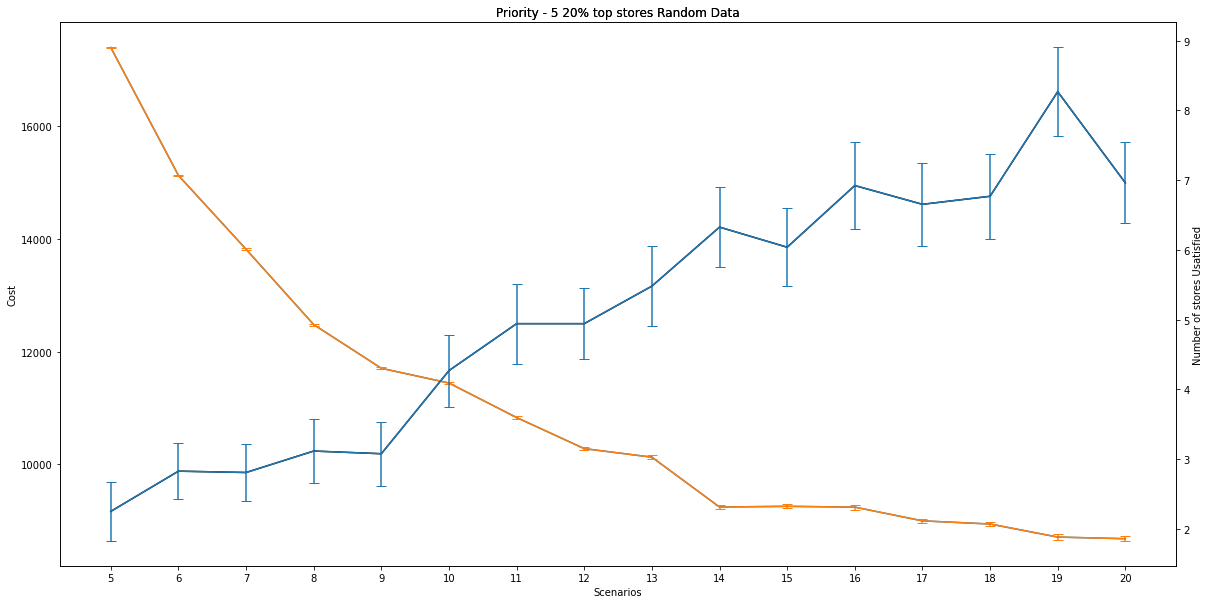

In [778]:
fig, (ax1) = plt.subplots(1,1,figsize = (20,10))
n=[i+5 for i in range(len(expected_cost_p5_rd))]
ax1.plot(n,expected_cost_p5_rd)
yo=ci(cost_routes_p5_rd)
ax1.set_xticks(n)
ax1.set_title('Priority - 5 20% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_p5_rd,yerr=yo,capsize=5)
ax2=ax1.twinx()
ax2.set_title('Priority - 5 20% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores Usatisfied')
ax2.plot(n,expected_stores_p5_rd,color='k')
yo=ci(stores_routes_p5_rd)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p5_rd,yerr=yo,capsize=5)

In [707]:
expected_stores_p5_rd[10]

6.038461538461538

In [708]:
expected_cost_p5_rd[10]

9253.729808787879

Using linearly Interpolated IECDF dataset we find the most optimum route and associated operating cost for it. We have assigned top ten stores to higher Priority of 5. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. So here none of the stores being missed out are more than 10. 

From these remaning scenarios the optimum cost is at scenario 20 (max 20 weights allowed in one route what this means that some stores ahve a higher weight 5 so the actual no. of stores may be less than 20, maybe 12 stores only if 2 higher priority groups are present along with the 10 lower priority).
But this is not practical to allow so many stores in one single route, maybe with increasded demand this route wont be optimal anymore. Because of that reason we observed that the scenario 15 is optimum. Because as we go below scenario 14 cost is increasing rapidly without any significant decrease in no. of stores being stocked out. Also if we compare btw scenario 15 and scenario 20 there is only small difference in cost but large differences in number of stores being stocked out. And it is a more practical model. Also out of scenario 14,15, and 16 scenario 15 is optimum in both cost and no. of stores being missed out. So the optimum cost is 9253.729808787879 $

In [711]:
# Using Common Rnadom Numbers to compare btw the 3 scenrios of assigning Priority 2, priority 3 and priority 5

# Best case scanrio: Priority 2 -Scanerio 11. 
cost_p2_d2_best=cost_routes_p2_rd[9]
stores_routes_p2_d2_best=stores_routes_p2_rd[9]

# Best case scanrio: Priorityt 3 - Scanerio 12. 
cost_p3_d2_best=cost_routes_p3_rd[9]
stores_routes_p3_d2_best=stores_routes_p3_rd[9]

# Best case scanrio: Priority - 5: Scanerio 16. 
cost_p5_d2_best=cost_routes_p5_rd[10]
stores_routes_p5_d2_best=stores_routes_p5_rd[10]

In [712]:
#Comparing btw Scenario priority 2 and Priority 3
cost_2=np.mean(cost_p2_d2_best)
cost_3=np.mean(cost_p3_d2_best)
z=np.array(cost_p2_d2_best)-np.array(cost_p3_d2_best)
sz = np.std(z)
lc=(cost_2-cost_3)-(1.96*sz/math.sqrt(33))
uc=(cost_2-cost_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated cost {lc,uc}')

store_2=np.mean(stores_routes_p2_d2_best)
store_3=np.mean(stores_routes_p3_d2_best)
z=np.array(stores_routes_p2_d2_best)-np.array(stores_routes_p3_d2_best)
sz=np.std(z)
lc_s=(store_2-store_3)-(1.96*sz/math.sqrt(33))
uc_s=(store_2-store_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc_s,uc_s}')

the confidence interval for associated cost (-629.8072777584791, -578.4648469302404)
the confidence interval for associated stores being missed out is (0.16314093556601034, 0.9137821413570664)


Based on this cost wise Model with priority 2 is better than model with priority 3, and on the basis of number of stores being stocked out model with priority 3 is better


In [698]:
cost_5=np.mean(cost_p5_d2_best)
cost_3=np.mean(cost_p3_d2_best)
z=np.array(cost_p5_d2_best)-np.array(cost_p3_d2_best)
sz = np.std(z)
lc=(cost_5-cost_3)-(1.96*sz/math.sqrt(33))
uc=(cost_5-cost_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc,uc}')

store_5=np.mean(stores_routes_p5_d2_best)
store_3=np.mean(stores_routes_p3_d2_best)
z=np.array(stores_routes_p5_d2_best)-np.array(stores_routes_p3_d2_best)
sz=np.std(z)
lc_s=(store_5-store_3)-(1.96*sz/math.sqrt(33))
uc_s=(store_5-store_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc_s,uc_s}')

the confidence interval for associated stores being missed out is (80.4998185434902, 166.4078123375279)
the confidence interval for associated stores being missed out is (3.3389948124881283, 4.46869749520418)


Based on this cost wise Model with priority 3 is better than model with priority 5, and also on the basis of number of stores being stocked out model with priority 3 is better

In [699]:
cost_5=np.mean(cost_p5_d2_best)
cost_2=np.mean(cost_p2_d2_best)
z=np.array(cost_p5_d2_best)-np.array(cost_p2_d2_best)
sz = np.std(z)
lc=(cost_5-cost_2)-(1.96*sz/math.sqrt(33))
uc=(cost_5-cost_2)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc,uc}')

store_5=np.mean(stores_routes_p5_d2_best)
store_2=np.mean(stores_routes_p2_d2_best)
z=np.array(stores_routes_p5_d2_best)-np.array(stores_routes_p2_d2_best)
sz=np.std(z)
lc_s=(store_5-store_2)-(1.96*sz/math.sqrt(33))
uc_s=(store_5-store_2)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc_s,uc_s}')

the confidence interval for associated stores being missed out is (689.1963085188974, 765.9834470508403)
the confidence interval for associated stores being missed out is (2.8469518694056593, 3.8838173613635725)


Based on this cost wise Model with priority 2 is better than model with priority 5, and also on the basis of number of stores being stocked out model with priority 2 is better

Based on this analysis using Common random numbers we can see that if the company's focus is cost then Model with Priority 2 is best, But if company's focus is to reduce no. of stores being stocked out then priority 3 is best.

#### priority top-30% assign higher priority  (which is top 16 stores)

If we are assigning higher percentage of stores to a priority we can observe that the number of stores being stockout will reduce. But also there is some associated cost which has increased along with it. (because if higher priority is being assigned to large number of stores that means we will require more routes in general and thus cost might increase).

In [394]:
list_weekly;
c_try_og2=[]
for j in n_stores:
    d=0
    for i in range(len(list_weekly)):
        for k,v in list_weekly[i].items():
            if k==j:
                d+=list_weekly[i][j]
    c_try_og2.append((j,d))

In [395]:
c_try_og2.sort(key=lambda x:x[1],reverse=True)
c_try_og2;

In [413]:
top_l2=[]
bottom_l2=[]
# Using Pareto Principle I am splitting datasets into 20% and 80%.
for i in range(len(c_try_og2)):
    if i<16:
        top_l2.append(c_try_og2[i][0])
    else:
        bottom_l2.append(c_try_og2[i][0])

#### priority -  2

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0xc17b7a6f
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Presolve added 1056 rows and 0 columns
Presolve removed 0 rows and 1408 columns
Presolve time: 0.15s
Presolved: 1260 rows, 1295 columns, 6020 nonzeros
Variable types: 35 continuous, 1260 integer (1260 binary)
Found heuristic solution: objective 10547.788230

Root relaxation: objective 4.008310e+03, 208 iterations, 0.01 seconds

    N

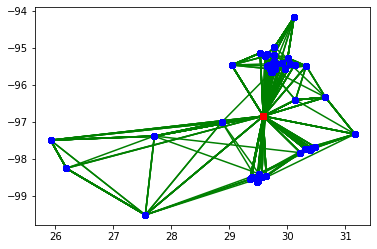

In [457]:
truck_cost=75
cost_routes_p2_rd_3=[]
stores_routes_p2_rd_3=[]
a=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    for i in range(len(dict_s_lp)):
        for j in top_l2:
            if dict_s_lp[i][0]==j:
                w[i]=2
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_p2_rd_3.append((cost_final))
    stores_routes_p2_rd_3.append(((avg_stores_missed)))

In [458]:
cost_routes_p2_rd_3;

In [459]:
stores_routes_p2_rd_3;

In [460]:
expected_cost_p2_rd_3=[]
expected_stores_p2_rd_3=[]
for i in range(len(stores_routes_p2_rd_3)):
    expected_cost_p2_rd_3.append(np.mean(cost_routes_p2_rd_3[i]))
    expected_stores_p2_rd_3.append((np.mean(stores_routes_p2_rd_3[i])))

In [540]:
expected_cost_p2_rd_3

[30033.498123262365,
 20896.788181447533,
 16042.528445636659,
 14215.197372513805,
 12876.086305735844,
 11612.236954889904,
 10443.777360921144,
 10315.590674813964,
 9424.983379957204,
 9399.50094367723,
 8566.814879575752,
 8492.192994687854,
 8718.352785481467,
 8864.848984096288,
 8522.013662745669,
 8222.689522899827,
 8455.424188873394,
 8363.882760479853,
 7837.308796042304]

<ErrorbarContainer object of 3 artists>

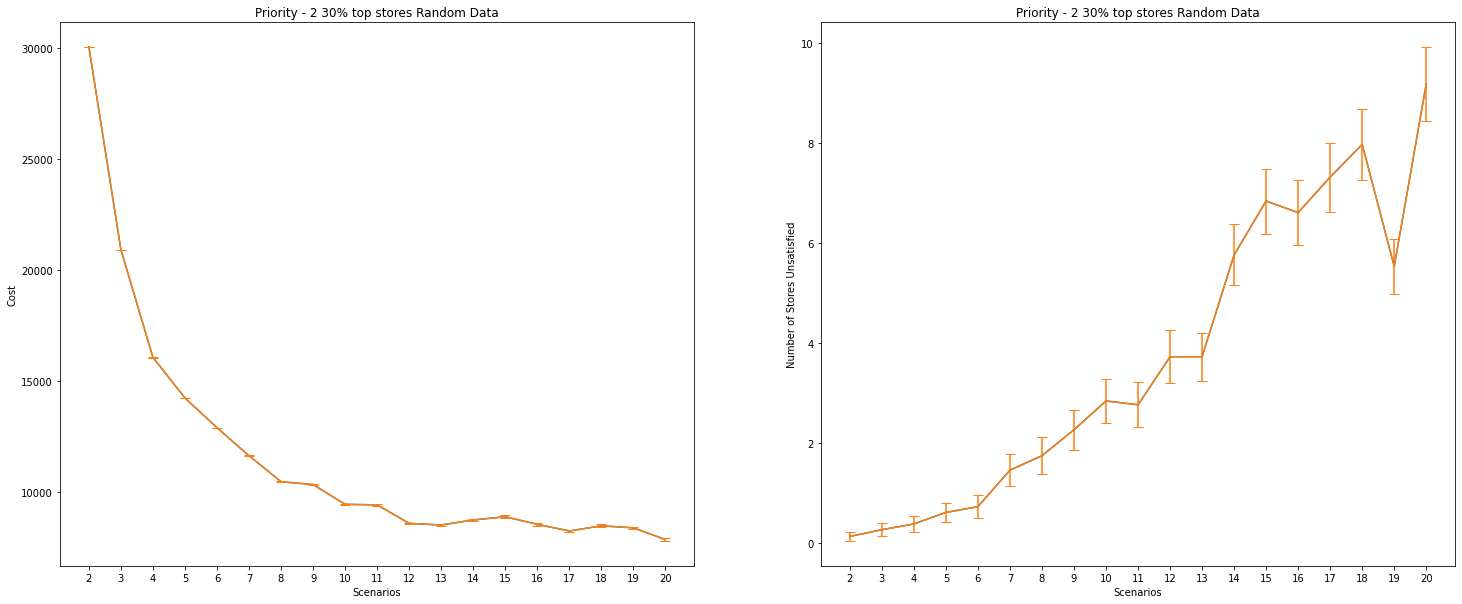

In [780]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
n=[i+2 for i in range(len(expected_cost_p2_rd_3))]
ax1.plot(n,expected_cost_p2_rd_3)
yo=ci(cost_routes_p2_rd_3)
ax1.set_title('Priority - 2 30% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_p2_rd_3,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_p2_rd_3)
yo=ci(stores_routes_p2_rd_3)
ax2.set_title('Priority - 2 30% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of Stores Unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p2_rd_3,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

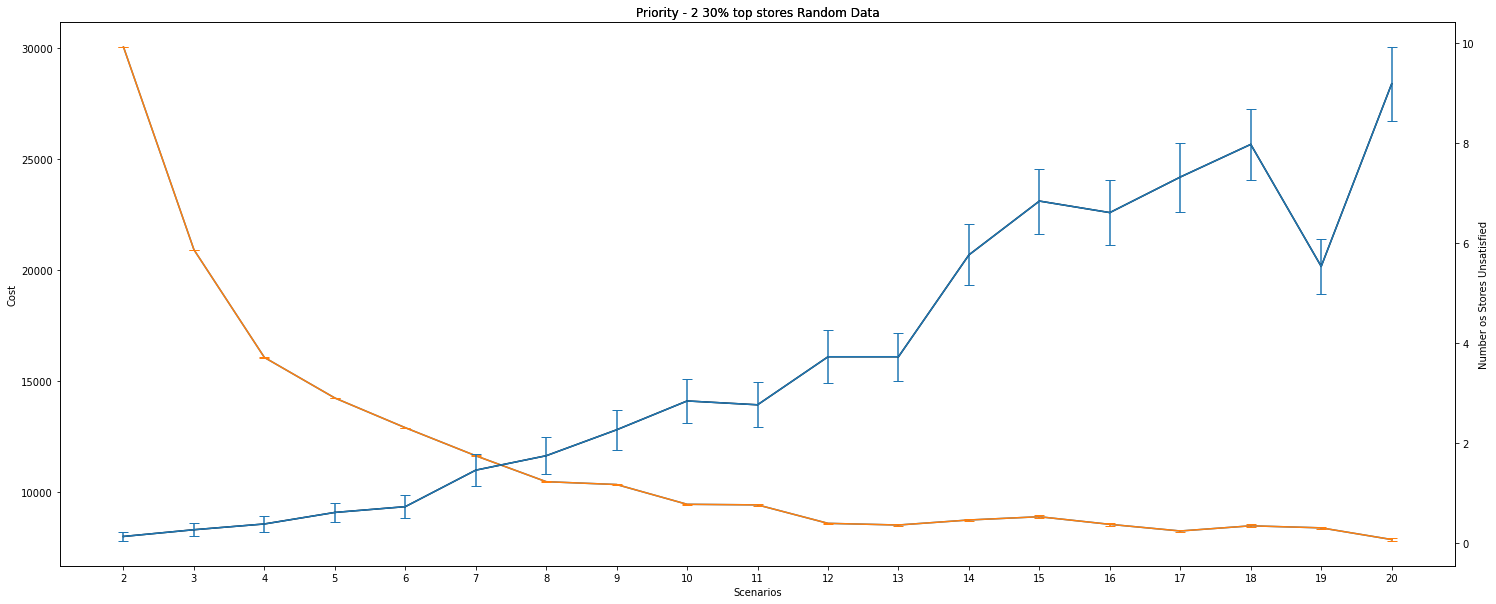

In [781]:
fig, (ax1) = plt.subplots(1,1,figsize = (25,10))
n=[i+2 for i in range(len(expected_cost_p2_rd_3))]
ax1.plot(n,expected_cost_p2_rd_3)
yo=ci(cost_routes_p2_rd_3)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_p2_rd_3,yerr=yo,capsize=5)
ax1.set_title('Priority - 2 30% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax2=ax1.twinx()
ax2.plot(n,expected_stores_p2_rd_3,color='k')
yo=ci(stores_routes_p2_rd_3)
ax2.set_title('Priority - 2 30% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number os Stores Unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p2_rd_3,yerr=yo,capsize=5)

In [701]:
expected_cost_p2_rd_3[11]

8492.192994687854

In [714]:
expected_stores_p2_rd_3[11]

3.730769230769231

Using linearly Interpolated IECDF dataset we find the most optimum route and associated operating cost for it. We have assigned top 30% stores to higher Priority of 2. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. So here none of the stores being missed out are more than 10. 

From these remaning scenarios the optimum cost is at scenario 20 (max 20 weights allowed in one route what this means that some stores ahve a higher weight 2 so the actual no. of stores may be less than 20).
But this is not practical to allow so many stores in one single route, maybe with increased demand this route wont be optimal anymore. Because of that reason we observed that the scenario 16 is optimum. Because as we go below scenario 12 cost is increasing rapidly . Also we can see that the there is significant decrease in no. of stores being stocked out as compared to small increase in cost. so according to us based on our analysis scenario 13 is best which is 8492.192994687854 $.

###### Priority 3

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0x705c8655
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
Presolve added 2745 rows and 0 columns
Presolve removed 0 rows and 861 columns
Presolve time: 0.31s
Presolved: 2949 rows, 1842 columns, 17913 nonzeros
Variable types: 582 continuous, 1260 integer (1260 binary)

Root relaxation: objective 3.983775e+03, 128 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bou

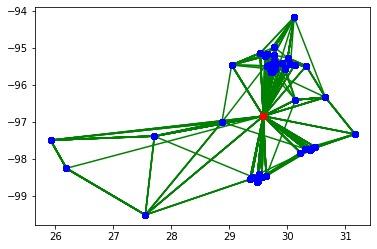

In [462]:
truck_cost=75
cost_routes_p3_rd_3=[]
stores_routes_p3_rd_3=[]
a=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    for i in range(len(dict_s_lp)):
        for j in top_l2:
            if dict_s_lp[i][0]==j:
                w[i]=3
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_p3_rd_3.append((cost_final))
    stores_routes_p3_rd_3.append(((avg_stores_missed)))

In [534]:
expected_cost_p3_rd_3=[]
expected_stores_p3_rd_3=[]
for i in range(len(stores_routes_p3_rd_3)):
    expected_cost_p3_rd_3.append(np.mean(cost_routes_p3_rd_3[i]))
    expected_stores_p3_rd_3.append((np.mean(stores_routes_p3_rd_3[i])))

In [543]:
expected_cost_p3_rd_3

[24941.0610665472,
 19187.71518050432,
 17173.181481248517,
 15097.497661919226,
 13680.51718677195,
 12423.145970748805,
 10986.00427901663,
 10363.487919354597,
 10398.25052781954,
 9904.011932798427,
 9196.248506803582,
 9337.01469582113,
 8422.699576818693,
 8524.174616317077,
 8394.286568316564,
 8368.118046693837,
 8407.883621913335,
 8586.637334971512]

<ErrorbarContainer object of 3 artists>

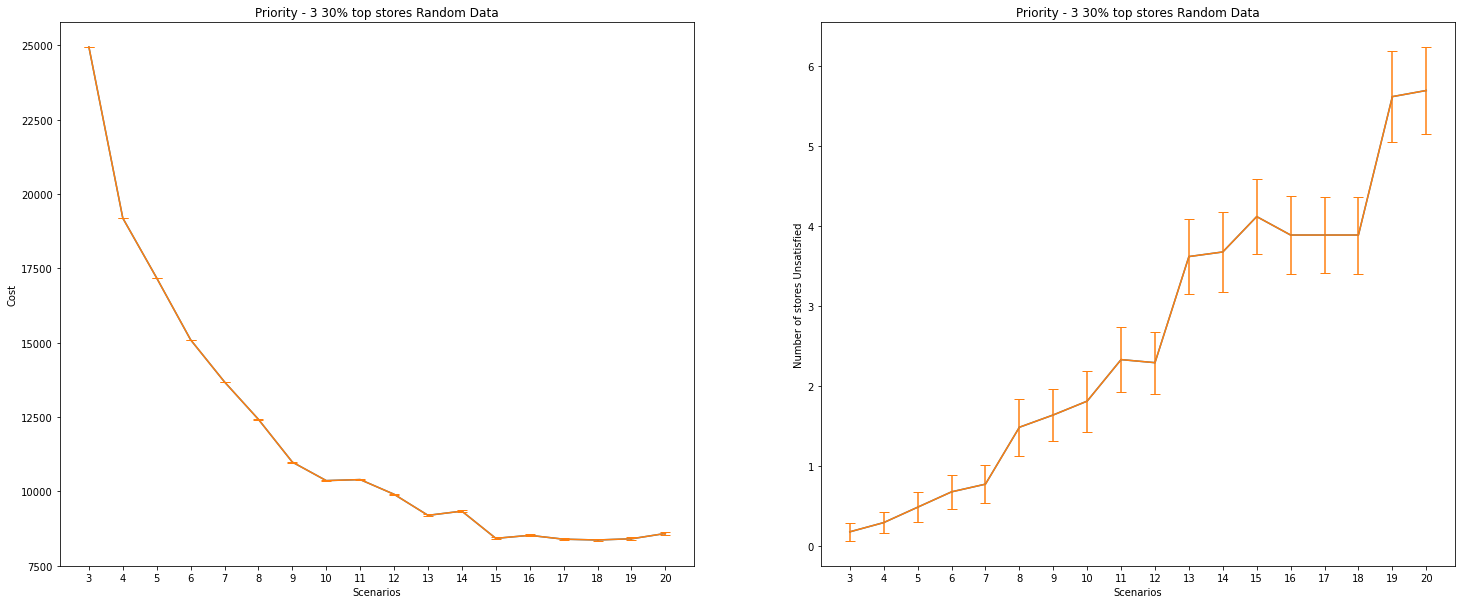

In [783]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
n=[i+3 for i in range(len(expected_cost_p3_rd_3))]
ax1.plot(n,expected_cost_p3_rd_3)
yo=ci(cost_routes_p3_rd_3)
ax1.set_xticks(n)
ax1.set_title('Priority - 3 30% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_p3_rd_3,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_p3_rd_3)
yo=ci(stores_routes_p3_rd_3)
ax2.set_title('Priority - 3 30% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores Unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p3_rd_3,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

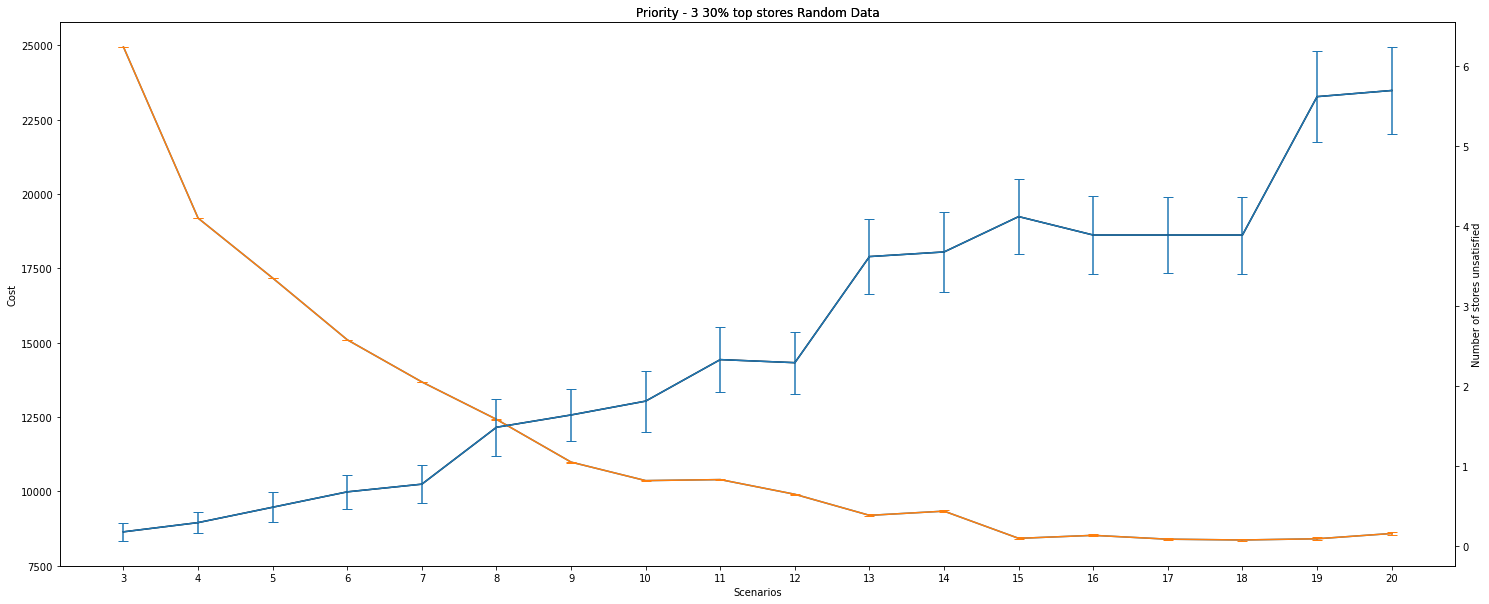

In [785]:
fig, (ax1) = plt.subplots(1,1,figsize = (25,10))
n=[i+3 for i in range(len(expected_cost_p3_rd_3))]
ax1.plot(n,expected_cost_p3_rd_3)
yo=ci(cost_routes_p3_rd_3)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_p3_rd_3,yerr=yo,capsize=5)
ax1.set_title('Priority - 3 30% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax2=ax1.twinx()
ax2.plot(n,expected_stores_p3_rd_3,color='k')
yo=ci(stores_routes_p3_rd_3)
ax2.set_title('Priority - 3 30% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p3_rd_3,yerr=yo,capsize=5)

In [715]:
expected_cost_p3_rd_3[10]

9196.248506803582

In [717]:
expected_stores_p3_rd_3[10]

3.6153846153846154

Using linearly Interpolated IECDF dataset we find the most optimum route and associated operating cost for it. We have assigned top 30% stores to higher Priority of 3. So for finding the optimum route We are eliminating all those scenarios where average number of stores being missed in each week is more than 10. Based on this we find the optimum cost from the remaining scenarios. So here none of the stores being missed out are more than 10. 

It's not practical to allow so many stores in one single route, maybe with increased demand this route won't be optimal anymore. As we go below scenario 15 cost is increasing rapidly . But we can see that there is significant decrease in no. of stores being (in scenario 13,14) stocked out as compared scenario (15,16,...20) with small increase in cost. so according to us based on our analysis scenario 13 is best which is 9196.248506803582 $.

###### Priority 5

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0x6391b638
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve added 2745 rows and 0 columns
Presolve removed 0 rows and 861 columns
Presolve time: 0.08s
Presolved: 2949 rows, 1842 columns, 17913 nonzeros
Variable types: 582 continuous, 1260 integer (1260 binary)

Root relaxation: objective 3.962986e+03, 121 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bou

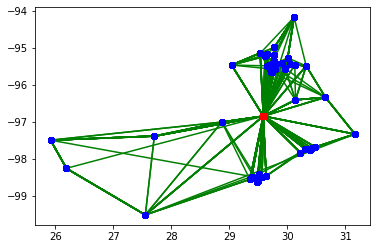

In [416]:
truck_cost=75
cost_routes_p5_rd_3=[]
stores_routes_p5_rd_3=[]
a=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for p in a:
    n=len(dict_s_lp)
    N = [i for i in range(1,n)]
    V = [0] + N
    A = [(i, j) for i in V for j in V if i != j]
    c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
    w = np.ones(len(dict_s_lp)-1)
    for i in range(len(dict_s_lp)):
        for j in top_l2:
            if dict_s_lp[i][0]==j:
                w[i]=5
    q = {N[i]:w[i] for i in range(len(N)) }
    x=lp(p,dict_s_lp,N,V,A,c,w,q)
    r=route_conv(x)
    dist=0
    dc=0
    dist_x=[]
    cd=0
    for j in r:
        dist=dist_finder(j)
        dist_x.append(dist)
        cd+=dist
        #c_pm+=dist*0.25    
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
    print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    cost_routes_p5_rd_3.append((cost_final))
    stores_routes_p5_rd_3.append(((avg_stores_missed)))


In [417]:
cost_routes_p5_rd_3;

In [418]:
stores_routes_p5_rd_3;

In [687]:
expected_cost_p5_rd_3=[]
expected_stores_p5_rd_3=[]
for i in range(len(stores_routes_p5_rd_3)):
    expected_cost_p5_rd_3.append(np.mean(cost_routes_p5_rd_3[i]))
    expected_stores_p5_rd_3.append((np.mean(stores_routes_p5_rd_3[i])))

In [688]:
expected_cost_p5_rd_3;

<ErrorbarContainer object of 3 artists>

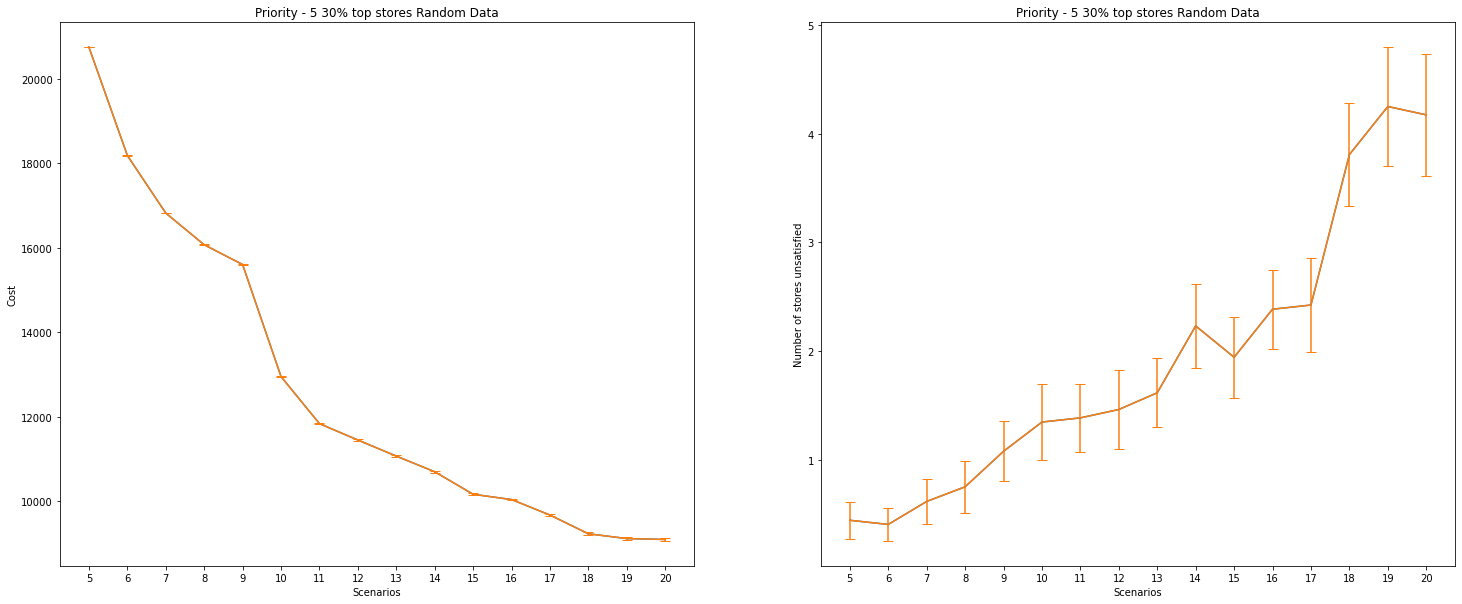

In [787]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
n=[i+5 for i in range(len(expected_cost_p5_rd_3))]
ax1.plot(n,expected_cost_p5_rd_3)
yo=ci(cost_routes_p5_rd_3)
ax1.set_xticks(n)
ax1.set_title('Priority - 5 30% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax1.errorbar(n,expected_cost_p5_rd_3,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_p5_rd_3)
yo=ci(stores_routes_p5_rd_3)
ax2.set_title('Priority - 5 30% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores unsatisfied')
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p5_rd_3,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

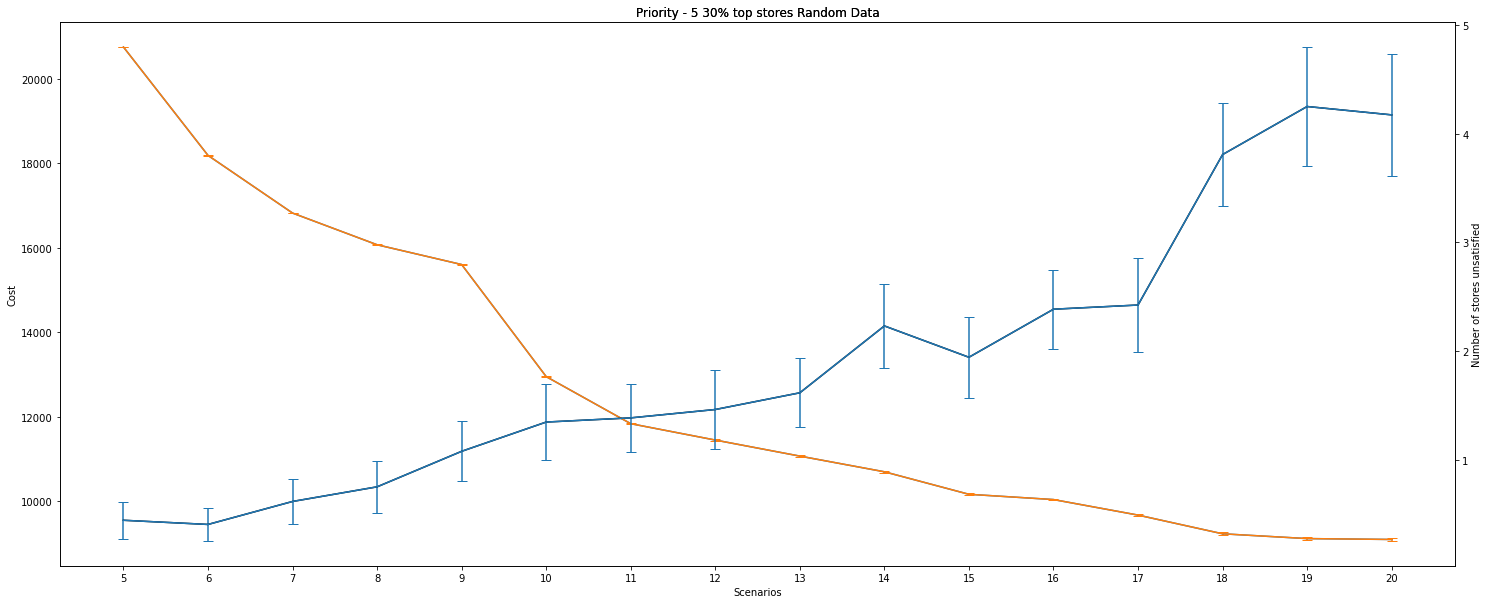

In [788]:
fig, (ax1) = plt.subplots(1,1,figsize = (25,10))
n=[i+5 for i in range(len(expected_cost_p5_rd_3))]
ax1.plot(n,expected_cost_p5_rd_3)
yo=ci(cost_routes_p5_rd_3)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_p5_rd_3,yerr=yo,capsize=5)
ax1.set_title('Priority - 5 30% top stores Random Data')
ax1.set_xlabel('Scenarios')
ax1.set_ylabel('Cost')
ax2=ax1.twinx()
ax2.plot(n,expected_stores_p5_rd_3,color='k')
ax2.set_title('Priority - 5 30% top stores Random Data')
ax2.set_xlabel('Scenarios')
ax2.set_ylabel('Number of stores unsatisfied')
yo=ci(stores_routes_p5_rd_3)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_p5_rd_3,yerr=yo,capsize=5)

In [718]:
expected_cost_p5_rd_3[10]

10167.632949792851

In [719]:
expected_stores_p5_rd_3[10]

1.9423076923076923

From this we can see that if the priority is assigned 5, so in that case we can see that below 15 the cost is increasing rapidly without significant decrease in no. of stores in being stocked out. So Based on our analysis scenario 15 is optimal which is 10167.632949792851 $

In [720]:
# Using Common Rnadom Numbers to compare btw the 3 scenrios of assigning Priority 2, priority 3 and priority 5

# Best case scanrio: Priority 2 -Scanerio 13. 
cost_p2_d3_best=cost_routes_p2_rd_3[11]
stores_routes_p2_d3_best=stores_routes_p2_rd_3[11]

# Best case scanrio: Priorityt 3 - Scanerio 13. 
cost_p3_d3_best=cost_routes_p3_rd_3[10]
stores_routes_p3_d3_best=stores_routes_p3_rd_3[10]

# Best case scanrio: Priority - 5: Scanerio 15. 
cost_p5_d3_best=cost_routes_p5_rd_3[10]
stores_routes_p5_d3_best=stores_routes_p5_rd_3[10]

In [721]:
#Comparing btw Scenario priority 2 and Priority 3
cost_2=np.mean(cost_p2_d3_best)
cost_3=np.mean(cost_p2_d3_best)
z=np.array(cost_p2_d2_best)-np.array(cost_p3_d2_best)
sz = np.std(z)
lc=(cost_2-cost_3)-(1.96*sz/math.sqrt(33))
uc=(cost_2-cost_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated cost {lc,uc}')

store_2=np.mean(stores_routes_p2_d3_best)
store_3=np.mean(stores_routes_p3_d3_best)
z=np.array(stores_routes_p2_d2_best)-np.array(stores_routes_p3_d2_best)
sz=np.std(z)
lc_s=(store_2-store_3)-(1.96*sz/math.sqrt(33))
uc_s=(store_2-store_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc_s,uc_s}')

the confidence interval for associated cost (-25.671215414119352, 25.671215414119352)
the confidence interval for associated stores being missed out is (-0.25993598751091257, 0.4907052182801434)


Based on this as 0 is falling btw both confidence intervals of both associated cost and associated no. of stores being missed out, so we can't compare btw the 2 models

In [548]:
cost_5=np.mean(cost_p5_d3_best)
cost_3=np.mean(cost_p3_d3_best)
z=np.array(cost_p5_d3_best)-np.array(cost_p3_d3_best)
sz = np.std(z)
lc=(cost_5-cost_3)-(1.96*sz/math.sqrt(33))
uc=(cost_5-cost_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc,uc}')

store_5=np.mean(stores_routes_p5_d3_best)
store_3=np.mean(stores_routes_p3_d3_best)
z=np.array(stores_routes_p5_d3_best)-np.array(stores_routes_p3_d3_best)
sz=np.std(z)
lc_s=(store_5-store_3)-(1.96*sz/math.sqrt(33))
uc_s=(store_5-store_3)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc_s,uc_s}')

the confidence interval for associated stores being missed out is (943.0543975723674, 999.7144884061702)
the confidence interval for associated stores being missed out is (-2.100071604066849, -1.2460822420869975)


Based on this cost wise Model with priority 3 is better than model with priority 5, and on the basis of number of stores being stocked out model with priority 5 is better

In [549]:
cost_5=np.mean(cost_p5_d3_best)
cost_2=np.mean(cost_p2_d3_best)
z=np.array(cost_p5_d3_best)-np.array(cost_p2_d3_best)
sz = np.std(z)
lc=(cost_5-cost_2)-(1.96*sz/math.sqrt(33))
uc=(cost_5-cost_2)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc,uc}')

store_5=np.mean(stores_routes_p5_d3_best)
store_2=np.mean(stores_routes_p2_d3_best)
z=np.array(stores_routes_p5_d3_best)-np.array(stores_routes_p2_d3_best)
sz=np.std(z)
lc_s=(store_5-store_2)-(1.96*sz/math.sqrt(33))
uc_s=(store_5-store_2)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc_s,uc_s}')

the confidence interval for associated stores being missed out is (1641.8858446441907, 1708.994065565804)
the confidence interval for associated stores being missed out is (-2.2186705272938054, -1.3582525496292714)


Based on this cost wise Model with priority 2 is better than model with priority 5, and on the basis of number of stores being stocked out model with priority 5 is better

Based on this analysis using Common random numbers we can see that if the company's focus is cost then Model we cant decide which model to choose between 2 and 3 because 0 is falling btw the confidence intervals (but we also know that wth sudden increase in demand there is chance that model with higher priority will perfrom better thats why we have choosen scenario 3), But if company's focus is to reduce no. of stores being stocked out then model with priority 5 is best.

###### Final Model Selection

In [725]:
# CRN TO COMPARE BTW BEST cost effective MODEL of 20% and 30%.
cost_30=np.mean(cost_p3_d3_best)
cost_20=np.mean(cost_p2_d2_best)
z=np.array(cost_p3_d3_best)-np.array(cost_p2_d2_best)
sz = np.std(z)
lc=(cost_30-cost_20)-(1.96*sz/math.sqrt(33))
uc=(cost_30-cost_20)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc,uc}')

the confidence interval for associated stores being missed out is (644.8418451354794, 723.1941412433387)


In [726]:
# CRN TO COMPARE BTW BEST minimum stores stockouts MODEL of 20% and 30%.
store_30=np.mean(stores_routes_p5_d3_best)
store_20=np.mean(stores_routes_p3_d2_best)
z=np.array(stores_routes_p5_d3_best)-np.array(stores_routes_p3_d2_best)
sz = np.std(z)
lc=(store_30-store_20)-(1.96*sz/math.sqrt(33))
uc=(store_30-store_20)+(1.96*sz/math.sqrt(33))
print(f'the confidence interval for associated stores being missed out is {lc,uc}')

the confidence interval for associated stores being missed out is (-1.4424813475203648, -0.7113648063257889)


So based on this we can say that for minimum cost the best choosen model with priority 2 for 20% of data is better the best choosen model of priority 3 for 30 30% data. To minimize the number of stores being unsatsfied model with priority 5 for 30% data is better then model with priority 3 for 20% of the data.

### Savings Method - Heuristic

In [249]:
store_coord;
stores=[]
x_cordinates=[]
y_cordinates=[]
for i in store_coord.index:
    stores.append(store_coord['Store'][i])
    x_cordinates.append(store_coord['X'][i])
    y_cordinates.append(store_coord['Y'][i])
x_cordinates=[x_final]+x_cordinates
y_cordinates=[y_final]+y_cordinates
stores=[0]+stores

In [250]:
w=len(stores)
h=len(stores)-1

In [789]:
# Creating Distance Matrix, because we will have pair wise distances

In [251]:
Matrix=[[0 for x in range(w)] for y in range(h)]

In [252]:
for i in range(w+1):
    for j in range(i,h):
        if i<=len(x_cordinates)-2: # Not required if you can change the range
            #Matrix[i][j]=math.sqrt((x_val[i]-x_val[i+(j-i)])**2+(y_val[i]-y_val[i+(j-i)])**2)
            #Matrix[i][j]=math.sqrt((x_c[i]-x_c[i+(j-i)])**2+
                                   #(y_c[i]-y_c[i+(j-i)])**2)
            Matrix[i][j]=distance(x_cordinates[i],x_cordinates[j],y_cordinates[i],y_cordinates[j])
            Matrix[i][i]=0 # node to node distance

In [253]:
Matrix

[[0,
  76.18610794619538,
  157.96788779261811,
  106.27797094055441,
  76.23523568428531,
  86.66964571503077,
  89.9460381583319,
  53.369731014997505,
  75.32526512232259,
  85.26868045048873,
  94.84340190046056,
  112.96689239544607,
  103.18695328024732,
  253.36997072609847,
  82.01003277173686,
  112.74316798292045,
  259.07691168997314,
  66.35434976118022,
  110.02075052836965,
  109.07279331746797,
  77.10330958765401,
  96.41595364931939,
  84.21490412861839,
  75.82950133877667,
  137.02732226821203,
  41.80675703050493,
  80.14215885918404,
  219.87030334867896,
  253.5844295663764,
  75.29047700283525,
  105.11418308930999,
  82.10980653515863,
  80.69628286574532,
  77.62951069539632,
  137.02816949389637,
  94.85719481471948,
  77.23766360780904,
  96.67660426667923,
  83.88133179872042,
  93.70094683379006,
  71.79003987931891,
  91.18757037113784,
  78.71963346071185,
  92.47993335991727,
  80.41223700492978,
  75.66482364919007,
  74.94325549779167,
  99.69126911331

In [791]:
# Creating Savings Matrix, because we will have pair wise Savings

In [254]:
w, h = len(stores)-1, len(stores)-1
Saving = [[0 for x in range(w)] for y in range(h)] 

In [255]:
for i in range(w+1):
    for j in range(i,h):
        if i<=len(x_cordinates)-3:
            Saving[i][j]=Matrix[0][i+1]+Matrix[0][j+1]-Matrix[i+1][j+1]
        if i==j:
            Saving[i][j]=0

In [256]:
Saving

[[0,
  100.10763647261328,
  81.61774623181638,
  152.36798634469372,
  39.69184594112937,
  110.83265475500554,
  0.013603860850963656,
  84.74350810901194,
  97.58901289333608,
  72.37198057109696,
  30.0755638094233,
  33.96937858603067,
  0.06849808103874011,
  83.21366356569821,
  120.36481471203003,
  0.6278699763585678,
  66.663350800763,
  25.994874865846185,
  29.93745776248994,
  68.50608040391496,
  67.3621301339333,
  75.65381637795181,
  66.265462701202,
  0.03741433168013941,
  82.13008345181406,
  73.1110388681798,
  8.556928018326175,
  0.07711893097160782,
  65.30142262383039,
  26.092196445737528,
  77.34171480401584,
  70.64483210930425,
  59.903019551783174,
  0.03147940895021861,
  72.59057855953662,
  70.62195556370307,
  67.3059750364384,
  92.57288459498704,
  78.17713467654602,
  72.39288290942373,
  69.72820822083703,
  71.5002664798368,
  91.02582394168782,
  76.80654640300418,
  66.1126100018135,
  84.6813128092763,
  29.251290611197305,
  30.313703203135674

In [257]:
# Sorting the Savings in highest to lowest order
dict_rank={}
for i in range(w):
    for j in range(w):
        dict_rank[(stores[i+1],stores[j+1])]=Saving[i][j]

dict_rank=dict(sorted(dict_rank.items(), key=lambda item: item[1],reverse=True))
dict_rank

{(1341, 359): 506.1774911360295,
 (1341, 1348): 462.41839636914966,
 (1348, 359): 461.88899767358953,
 (1590, 359): 351.56014392250995,
 (1341, 1590): 350.8046800926901,
 (1348, 1590): 310.94452888306546,
 (1561, 526): 273.61239553746003,
 (1341, 526): 273.00441561034967,
 (359, 526): 272.9309895495861,
 (1341, 1561): 272.920830922438,
 (1561, 359): 272.8447364982199,
 (1348, 1561): 272.40394404763896,
 (1348, 526): 272.30512345688874,
 (1348, 585): 259.07691168997314,
 (359, 585): 253.5844295663764,
 (1341, 585): 253.36997072609847,
 (1590, 526): 226.50507514894707,
 (1561, 1590): 226.0888094339362,
 (1036, 581): 222.39526389351389,
 (1590, 585): 219.87030334867896,
 (1401, 581): 218.1253214605777,
 (1036, 1401): 218.09832142709408,
 (1036, 1373): 213.71809166830258,
 (1373, 581): 211.61757526229587,
 (95, 97): 210.3453057790218,
 (1373, 503): 210.0501308232981,
 (1373, 1401): 209.80881696638,
 (581, 582): 207.52752443195394,
 (1036, 503): 207.40052815655335,
 (1036, 582): 207.2913938

In [258]:
demand_n=np.ones(len(stores)-1)

In [259]:
import pdb
from collections import defaultdict

In [260]:
store_list=stores
store_list.pop(0)
len(store_list)

51

In [792]:
# Savings Algorithm

In [261]:
def savings_method(t_cap,store_list,dict_rank_new):
    # CREATING DEDAUKLT DICT TO KEEP TRACK OF WHICH ALL stores have been included in the routes
    vis=defaultdict(int)

    truck_cap=t_cap
    route_n=[]
    store_list=store_list
    a=True
    x=0
    while a:
        #print(x)
        route=[]
        truck_cap=t_cap
        #pdb.set_trace()
        c=True
        for k,v in dict_rank_new.items():
            if vis[k[0]]==1:
                # if true basically this store is already in route so we wont want to include it in route again
                temp1=0
            else:
                temp1=v[0]
                # otherwise we are including it
            if vis[k[1]]==1:
                temp2=0
            else:
                temp2=v[1]
            if (temp1+temp2)>0 and (temp1+temp2)<=truck_cap:
                # only add if total capacity is less thean truck capacity 
                truck_cap=truck_cap-(temp1+temp2)
                if not vis[k[0]]:
                    # basically checking if this store is in route or not
                    route.append(k[0])
                    vis[k[0]]=1
                if  not vis[k[1]]:
                    route.append(k[1])
                    vis[k[1]]=1
                dict_rank_new[k]=(0,0)

        route_n.append(route)
        #print(route_n)
        truck_cap=t_cap

        temp_x=[]
        for val in route_n:
            temp_x+=val

        if len(temp_x)>=len(store_list):
            a=False
        x+=1
    return route_n


In [644]:
#Initialization
truck_cost=75
cost_per_mile=3
driver_p=20
speed=45

In [645]:
def dist_finder2(l):
    dx=0

    for i in range(len(l)-1):
        dx+=distance(xb[l[i]][0],xb[l[i+1]][0],xb[l[i]][1],xb[l[i+1]][1])
        dx+=distance(xb[0][0],xb[l[0]][0],xb[0][1],xb[l[0]][1])
        dx+=distance(xb[l[-1]][0],xb[0][0],xb[l[-1]][1],xb[0][1])
    return dx

In [646]:
opt_routes=[]
cost_routes=[]
stores_missed=[]
# a is basiucaaly no. of stops required in each route
a=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in a:
    dict_rank_new={}
    for k, v in dict_rank.items():
        if v!=0:
            dict_rank_new[k]=(1,1)
    x=savings_method(i,store_list,dict_rank_new)    
    dist=0
    dc=0
    dist_x=[]
    cd=0
    r=x
    for p in r:
        p.insert(0,0)
        p.insert(-1,0)
        #print(p)
    for j in r:
        dist=dist_finder2(j)
        dist_x.append(dist)
        cd+=dist
    #print(cd)
        #c_pm+=dist*0.25  
    
    #print((r))
        
    cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
    stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_weekly)
    #print(stores_in_routes)
    cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
    #print(cost_final)
    cost_routes.append((cost_final))
    stores_missed.append(((avg_stores_missed)))

In [647]:
stores_missed;

In [648]:
cost_routes;

In [649]:
expected_cost_savings=[]
expected_stores_savings=[]
for i in range(len(cost_routes)):
    expected_cost_savings.append(np.mean(cost_routes[i]))
    expected_stores_savings.append(np.mean(stores_missed[i]))

<ErrorbarContainer object of 3 artists>

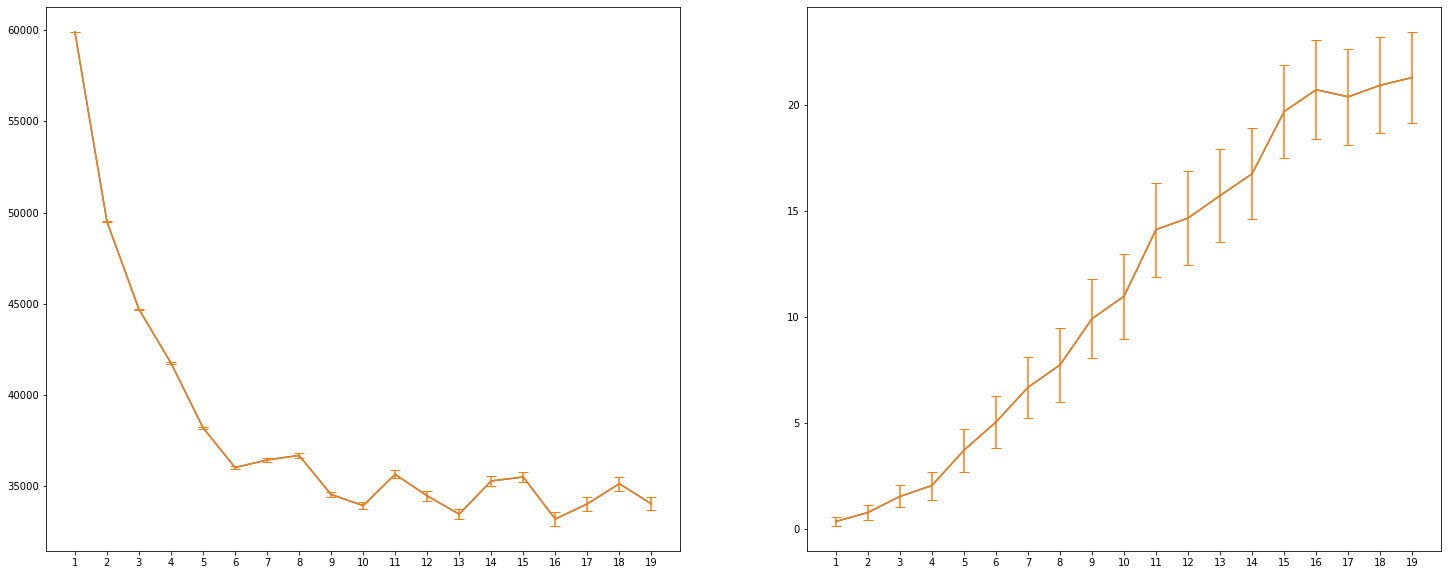

In [793]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (25,10))
n=[i+1 for i in range(len(expected_stores_savings))]
ax1.plot(n,expected_cost_savings)
yo=ci(cost_routes)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_savings,yerr=yo,capsize=5)
ax2.plot(n,expected_stores_savings)
yo=ci(stores_missed)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_savings,yerr=yo,capsize=5)

<ErrorbarContainer object of 3 artists>

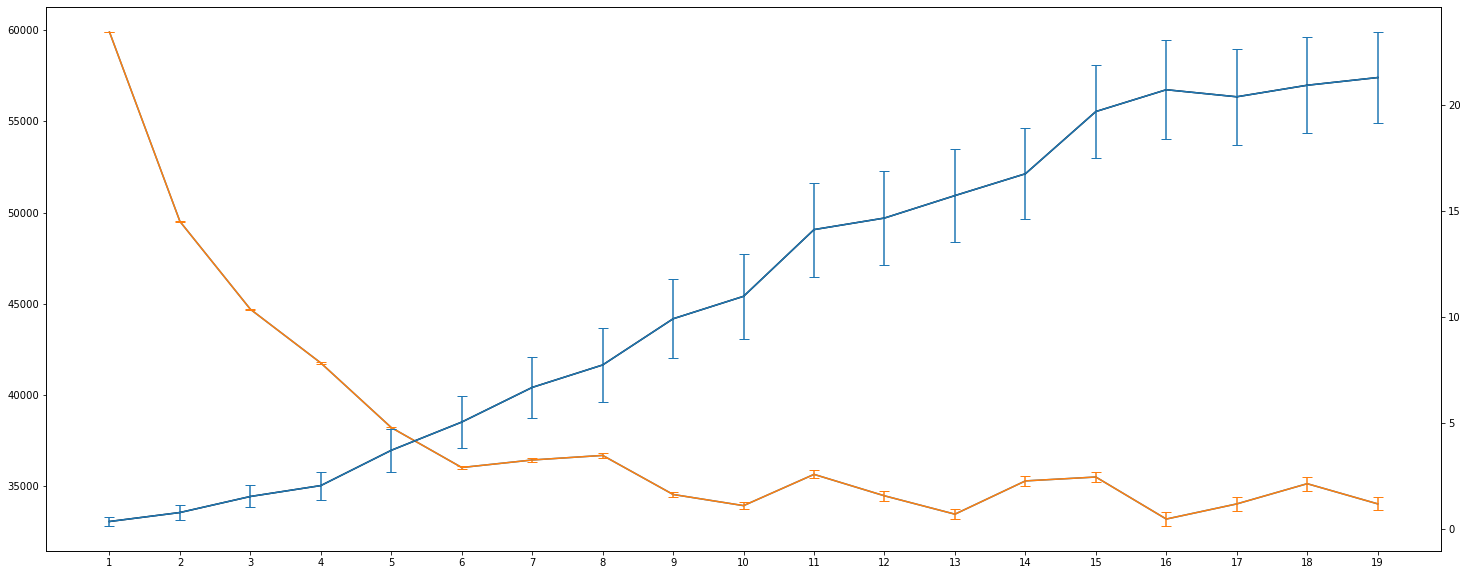

In [651]:
fig, (ax1) = plt.subplots(1,1,figsize = (25,10))
n=[i+1 for i in range(len(expected_stores_savings))]
ax1.plot(n,expected_cost_savings)
yo=ci(cost_routes)
ax1.set_xticks(n)
ax1.errorbar(n,expected_cost_savings,yerr=yo,capsize=5)
ax2=ax1.twinx()
ax2.plot(n,expected_stores_savings,color='k')
yo=ci(stores_missed)
ax2.set_xticks(n)
ax2.errorbar(n,expected_stores_savings,yerr=yo,capsize=5)

In [727]:
expected_cost_savings[6]

36450.75820578845

In [728]:
expected_stores_savings[6]

6.666666666666667

Based on the graph we can see that the scenario 6 is most optimum.

#### AFFECT OF UNCONTROLLABLE FACTORS

In [552]:
###############################
# CHANGING uncontrallable factors (Possible)
# 1. fuel price 3 per mile changed to 5 per mile
# 2. Workers asking for increased salary 35
# 3. demand suddenly doubled
# 4. Higher stockputs payment
# 5. road block - route changed

##### fuel price 3 per mile changed to 5 per mile

In [674]:
def cost2_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost):
    unmet_stores = np.array(stores_in_routes)-np.array(no_stores_visit)
    unmet_demand = Capacity_req
    for i in range(len(unmet_demand)):
        for j in range(len(unmet_demand[i])):
            unmet_demand[i][j]=max(0,unmet_demand[i][j]-40000)
    cost_final_arr=[]
    for i in range(len(unmet_stores)):
        cost_arr=[]
        for j in range(len(unmet_stores[i])):
            # cost including time
            if unmet_stores[i][j]!=0:
                cost1=250*((unmet_demand[i][j]//40000)+1)+5.25*dist_trav[i][j]+(unmet_stores[i][j]+no_stores_visit[i][j])*(0.5*30)
                cost2=unmet_stores[i][j]*500 + no_stores_visit[i][j]*0.5*30
                cost_final=cost+min(cost1,cost2)
#                 if cost2<cost1:
#                     final_st.append(x[i])
#                 else:
#                     x[i]=0
#                     final_st.append(x[i])
            else:
                cost_final=cost+no_stores_visit[i][j]*0.5*30
            cost_arr.append(cost_final)
        cost_final_arr.append(np.mean(cost_arr))
    stores_missed=[]
    for i in unmet_stores:
        stores_missed.append(np.sum(i))
        
    return cost_final_arr,stores_missed

In [794]:
# Model 1 - Priority 2, TOP 20% data

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0x9090ec3c
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve added 6287 rows and 1289 columns
Presolve time: 0.23s
Presolved: 6491 rows, 3992 columns, 33479 nonzeros
Variable types: 1326 continuous, 2666 integer (2652 binary)

Root relaxation: objective 1.001157e+03, 199 iterations, 0.02 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

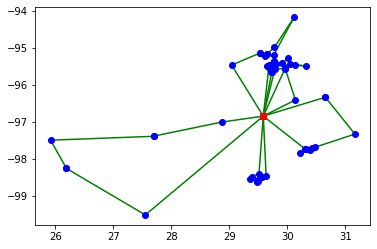

In [729]:
truck_cost=75
cost_routes_p5_rd_uc=[]
stores_routes_p5_rd_uc=[]
n=len(dict_s_lp)
N = [i for i in range(1,n)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
w = np.ones(len(dict_s_lp)-1)
for i in range(len(dict_s_lp)):
    for j in top_l:
        if dict_s_lp[i][0]==j:
            w[i]=2
q = {N[i]:w[i] for i in range(len(N)) }
x=lp(11,dict_s_lp,N,V,A,c,w,q)
r=route_conv(x)
dist=0
dc=0
dist_x=[]
cd=0
for j in r:
    dist=dist_finder(j)
    dist_x.append(dist)
    cd+=dist
    #c_pm+=dist*0.25    
cost=truck_cost*len(x)+(5+0.25)*cd+(cd/45)*20
stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
print(stores_in_routes)
cost_final,avg_stores_missed=cost2_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
#cost_routes_p5_rd.append((cost_final))
#stores_routes_p5_rd.append(((avg_stores_missed)))


In [730]:
np.mean(avg_stores_missed)

6.423076923076923

In [731]:
np.mean(cost_final)

12672.329717653602

In [796]:
# Model 2 - Priority 5, TOP 30% data

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0xaf6d5dab
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 6287 rows and 1289 columns
Presolve time: 0.17s
Presolved: 6491 rows, 3992 columns, 31433 nonzeros
Variable types: 1326 continuous, 2666 integer (2652 binary)

Root relaxation: objective 1.010545e+03, 188 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

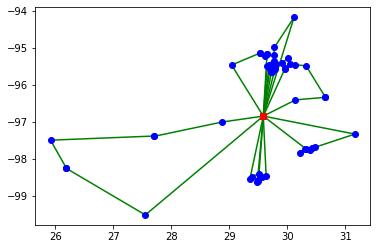

In [732]:
truck_cost=75
cost_routes_p5_rd3_uc=[]
stores_routes_p5_rd3_uc=[]
n=len(dict_s_lp)
N = [i for i in range(1,n)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
w = np.ones(len(dict_s_lp)-1)
for i in range(len(dict_s_lp)):
    for j in top_l2:
        if dict_s_lp[i][0]==j:
            w[i]=5
q = {N[i]:w[i] for i in range(len(N)) }
x=lp(15,dict_s_lp,N,V,A,c,w,q)
r=route_conv(x)
dist=0
dc=0
dist_x=[]
cd=0
for j in r:
    dist=dist_finder(j)
    dist_x.append(dist)
    cd+=dist
    #c_pm+=dist*0.25    
cost=truck_cost*len(x)+(5+0.25)*cd+(cd/45)*20
stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,list_random_weekly)
print(stores_in_routes)
cost_final2,avg_stores_missed2=cost2_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
#cost_routes_p5_rd.append((cost_final))
#stores_routes_p5_rd.append(((avg_stores_missed)))


In [733]:
np.mean(avg_stores_missed2)

4.211538461538462

In [734]:
np.mean(cost_final2)

15330.709349155319

##### Random Increased Demand

In [609]:
x_demand_inc=list_random_weekly
for i in range(len(x_demand_inc)):
    for k,v in x_demand_inc[i].items():
        c=np.random.random()
        if c>0.75:
            x_demand_inc[i][k]=v*1.25
            #print(x_demand_inc[i])


In [797]:
# Model 1 - Priority 2, TOP 20% data

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0x9090ec3c
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve added 6287 rows and 1289 columns
Presolve time: 0.14s
Presolved: 6491 rows, 3992 columns, 33479 nonzeros
Variable types: 1326 continuous, 2666 integer (2652 binary)

Root relaxation: objective 1.001157e+03, 199 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

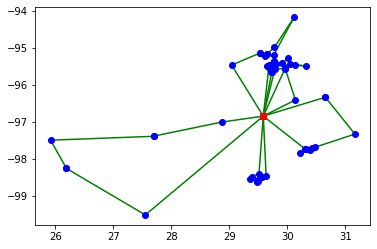

In [741]:
truck_cost=75
cost_routes_p5_rd=[]
stores_routes_p5_rd=[]
n=len(dict_s_lp)
N = [i for i in range(1,n)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
w = np.ones(len(dict_s_lp)-1)
for i in range(len(dict_s_lp)):
    for j in top_l:
        if dict_s_lp[i][0]==j:
            w[i]=2
q = {N[i]:w[i] for i in range(len(N)) }
x=lp(11,dict_s_lp,N,V,A,c,w,q)
r=route_conv(x)
dist=0
dc=0
dist_x=[]
cd=0
for j in r:
    dist=dist_finder(j)
    dist_x.append(dist)
    cd+=dist
    #c_pm+=dist*0.25    
cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r,dist_x,x_demand_inc)
print(stores_in_routes)
cost_final,avg_stores_missed=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
#cost_routes_p5_rd.append((cost_final))
#stores_routes_p5_rd.append(((avg_stores_missed)))

In [736]:
np.mean(avg_stores_missed)

4.9423076923076925

In [737]:
np.mean(cost_final)

10829.172489220042

In [798]:
# Model 2 - Priority 3, TOP 30% data

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 60.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 204 rows, 2703 columns and 5304 nonzeros
Model fingerprint: 0xaf6d5dab
Model has 2550 general constraints
Variable types: 51 continuous, 2652 integer (2652 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve added 6287 rows and 1289 columns
Presolve time: 0.11s
Presolved: 6491 rows, 3992 columns, 31433 nonzeros
Variable types: 1326 continuous, 2666 integer (2652 binary)

Root relaxation: objective 1.010545e+03, 188 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  

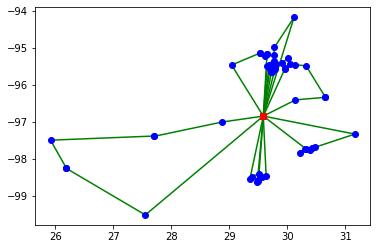

In [738]:
truck_cost=75
cost_routes_p5_rd=[]
stores_routes_p5_rd=[]
n=len(dict_s_lp)
N = [i for i in range(1,n)]
V = [0] + N
A = [(i, j) for i in V for j in V if i != j]
c = {(i, j):distance(dict_s_lp[i][1],dict_s_lp[j][1],dict_s_lp[i][2],dict_s_lp[j][2]) for i, j in A}
w = np.ones(len(dict_s_lp)-1)
for i in range(len(dict_s_lp)):
    for j in top_l2:
        if dict_s_lp[i][0]==j:
            w[i]=5
q = {N[i]:w[i] for i in range(len(N)) }
x=lp(15,dict_s_lp,N,V,A,c,w,q)
r2=route_conv(x)
dist=0
dc=0
dist_x=[]
cd=0
for j in r2:
    dist=dist_finder(j)
    dist_x.append(dist)
    cd+=dist
    #c_pm+=dist*0.25    
cost=truck_cost*len(x)+(3+0.25)*cd+(cd/45)*20
stores_in_routes, dist_trav, Capacity_req, no_stores_visit = scenario_measure(r2,dist_x,x_demand_inc)
print(stores_in_routes)
cost_final2,avg_stores_missed2=cost_calculation(stores_in_routes, dist_trav, Capacity_req, no_stores_visit,cost)
#cost_routes_p5_rd.append((cost_final))
#stores_routes_p5_rd.append(((avg_stores_missed)))


In [739]:
np.mean(cost_final2)

10286.370813081427

In [740]:
np.mean(avg_stores_missed2)

4.211538461538462